# Dinkey Creek
 
#### Project description 
Description of the Dinkey Creek watershed JFSP project

In [2]:
# Specify inline plots for notebook
%matplotlib inline
from matplotlib.font_manager import FontProperties

# Libraries -- overkill for the time being
import statsmodels.api as sm
import matplotlib.pyplot as plt
from lxml import etree
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime
from osgeo import gdal
import fiona
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from descartes import PolygonPatch
from itertools import chain
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Set working dir
wrkDir = 'C:/Research/Dinkey_Creek/GIS_Data_And_Maps/'


C:\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


### Ecoregion Creation
#### The Dinkey Creek landsacpe is characterized by an elevation gradient, increasing along a southwest to northeast transect over ~300 - 3000 meters (Fig 1). Initially, we split the landscape into five elevation bins, which roughly corresponded with broad patterns in precipitation and temperature trends across the watershed. 

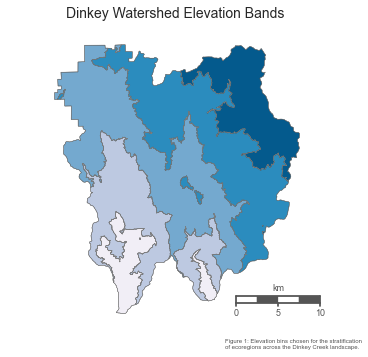

In [68]:
shp = fiona.open(wrkDir + 'DinkeyElevationShp.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig1 = plt.figure(figsize = (6,6))
ax = fig1.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)
    
m.readshapefile(wrkDir + 'DinkeyElevationShp', 'Elevation',
    color='grey',
    zorder=2)

# set up a map dataframe
elev = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.Elevation]})
for shape in enumerate(df_map['poly']):
    keys, values = m.Elevation_info[shape[0]].keys(),m.Elevation_info[shape[0]].values()
    elev.append(values[1])
df_map['Elevation'] = elev
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

# Paint the features
# Colormap for elevation
elevFC = ['#f1eef6','#bdc9e1','#74a9cf','#2b8cbe','#045a8d']
idx = 0 # Colormap iterator
for feature in np.unique(df_map.Elevation):
    ax.add_collection(PatchCollection(df_map.patches[df_map.Elevation == feature], facecolor= elevFC[idx]))
    idx = idx + 1
ax.set_title('Dinkey Watershed Elevation Bands', fontsize = 14)
smallprint = ax.text(
    .65, 0,
    '''Figure 1: Elevation bins chosen for the stratification
of ecoregions across the Dinkey Creek landscape.''',
    size=6,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.015,
    coords[0], coords[1],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()

We used GSSURGO data to bin the landscape by soil parent material (Figure 2), which roughly tracked soil and clay content, and consequently water holding capacity. We then generated ecoregions given the stratification of elevation and soil groups (Figure 3), such that within each ecoregion, soil and climate characteristics are reasonably homogeneous. Nine distinct parent material groups were lumped into three related bins to simplify the landscape (Table 1). 

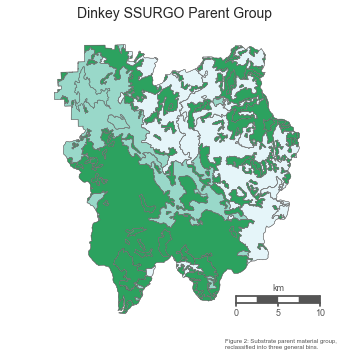

Table 1: The attribute table for the GSSURGO vector data that we used to define coregions
described nine distinct groups. In an effort to represent the edaphic gradient acros the Dinkey
Watershed, we binned these parent material groups into three categories (Figure 2)


In [3]:
shp = fiona.open(wrkDir + 'DinkeyGSSURGODissolveNAD83.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig2 = plt.figure(figsize = (6,6))
ax = fig2.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)
    
m.readshapefile(wrkDir + 'DinkeyGSSURGODissolveNAD83', 'PGroup',
    color='grey',
    zorder=2)

# set up a map dataframe
parentgroup = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.PGroup]})
for shape in enumerate(df_map['poly']):
    keys, values = m.PGroup_info[shape[0]].keys(),m.PGroup_info[shape[0]].values()
    parentgroup.append(values[3])
df_map['ParentGroup'] = parentgroup
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

# Paint the features
# Colormap for elevation
ParentGFC = ['#e5f5f9','#99d8c9','#2ca25f']
idx = 0 # Colormap iterator
for feature in np.unique(df_map.ParentGroup):
    ax.add_collection(PatchCollection(df_map.patches[df_map.ParentGroup == feature], facecolor= ParentGFC[idx]))
    idx = idx + 1
ax.set_title('Dinkey SSURGO Parent Group', fontsize = 14)
smallprint = ax.text(
    .65, 0,
    '''Figure 2: Substrate parent material group,
reclassified into three general bins.''',
    size=6,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.015,
    coords[0], coords[1],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()

# Display a table of the GSSURGO parent material binning for transparency
gssurgo_bins = pd.read_csv(wrkDir + 'GSSURGO_Dissolve.txt', sep = ',')
gssurgo_bins
print '''Table 1: The attribute table for the GSSURGO vector data that we used to define coregions
described nine distinct groups. In an effort to represent the edaphic gradient acros the Dinkey
Watershed, we binned these parent material groups into three categories (Figure 2)'''

We overlayed the three substrate bins and five elevation bands to generate the eight Landis-II ecoregions (Figure 3)

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


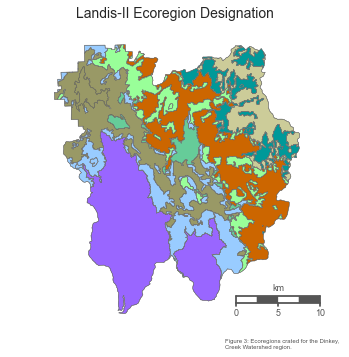

In [60]:
shp = fiona.open(wrkDir + 'EcoregionsNAD83.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig3 = plt.figure(figsize = (6,6))
ax = fig3.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)
    
m.readshapefile(wrkDir + 'EcoregionsNAD83', 'Ecoregion',
    color='grey',
    zorder=2)

# set up a map dataframe
ecoregion = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.Ecoregion]})
for shape in enumerate(df_map['poly']):
    keys, values = m.Ecoregion_info[shape[0]].keys(),m.Ecoregion_info[shape[0]].values()
    ecoregion.append(values[5])
df_map['Ecoregion'] = ecoregion
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

# Paint the features
# Colormap for elevation
EcoregionFC = ecocolors = ['#cc6600', '#9966ff','#999966',
                           '#99ccff', '#99ff99', '#cccc99', 
                           '#009999', '#66cc99']

idx = 0 # Colormap iterator
for feature in np.unique(df_map.Ecoregion):
    ax.add_collection(PatchCollection(df_map.patches[df_map.Ecoregion == feature], facecolor= EcoregionFC[idx]))
    idx = idx + 1
ax.set_title('Landis-II Ecoregion Designation', fontsize = 14)
smallprint = ax.text(
    .65, 0,
    '''Figure 3: Ecoregions crated for the Dinkey,
Creek Watershed region.''',
    size=6,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.015,
    coords[0], coords[1],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()

### Ecoregion wilting point, field cap, SOM and N values


Moving through the century ecoregion paramterization lists, sand and clay were 
quickly gleaned using zonal stats by ecoregion on the mean values for GSSURGO
sand and clay (representative values). 

Wilting point and field capacity were calculated from soil texture data (SSURGO)
Using the following ref:
K.E. Saxton et al., 1986 
Estimating generalized soil-water characteristics from texture. 
Soil Sci. Soc. Amer. J. 
50(4):1031-1036

Initial organic matter and nitrogen values, as well as N and OM decay rates 
were taken from Shuang et al., (temporary) as ballpark placeholders. 


### Adding shrubs to the landscape
The initial communities file prepared for Shuang et al., 2015 (?) does not contain any shrub species. We wanted to add two species,  Ceanothus cordulatus and Arctostaphylos patula, to the landscape. To do so, we simple added a functional group (shrub), and the two species paramterizations (from Loudermilk et al., 2013) to the century extension files. The only code for this task had to do with editing the initial communities text file.

In [42]:
# Ref for species paramterization:

# "Loudermilk, E. Louise, et al. "Carbon dynamics in the future forest: 
# the importance of long‐term successional legacy and climate–fire interactions.
# "Global change biology 19.11 (2013): 3502-3515."

# The task here is to add species cohorts to every map unit. The idea being that shrubs
# should have a chance to capitalize on fire wherever it happens, and the cost
# of adding them across the landscape is minimal given their negligible biomass.

# Read in and edit an existing text file ---
ic_filename = 'C:/Research/Dinkey_Creek/ic_dinkey.txt'
new_ic_filename = 'C:/Research/Dinkey_Creek/ic_dinkey_shrubs.txt'
with open(ic_filename) as f_old, open(new_ic_filename, "w") as f_new:
    for line in f_old:
        f_new.write(line)
        if 'MapCode' in line:
            f_new.write("whitethorn 10 20\n")
            f_new.write("greenleaf 10 20\n")

### Climate Data Selection and Summary
We chose to use Daymet Daily surface weather over a 1km grid for the study: doi:10.3334/ORNLDAAC/1219, as acquired via the USGS Geo Data Portal (http://cida.usgs.gov/gdp/). Weighted area grid statistics were computed by the export service on a per-ecoregion basis.

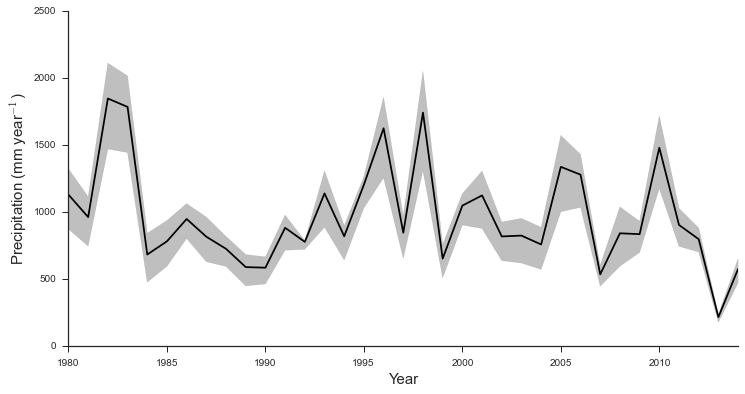

In [7]:
# Placeholder for plots of climate data by ecoregion
climdata = pd.read_csv('C:/Research/Dinkey_Creek/DinkeyClimate_PrecipMeans.csv')

climdata['TS'] = pd.to_datetime(climdata.TIMESTEP)
climdata.index = climdata.TS
recentclim = climdata[climdata.index.year > 1950]

fig4 = plt.figure(figsize = (12,6))
ax = fig4.add_subplot(111)
    
pcpAnnual = recentclim.groupby([recentclim.index.year]).sum()
#for ecoregion in np.arange(0,7):
    #pcpAnnual[[ecoregion]].plot(ax = ax, color = 'gray', alpha = 0.4)
pcpAnnual.mean(axis = 1).plot(ax = ax, color = 'black')
pcpAnnual['Year'] = pcpAnnual.index
plt.fill_between(pcpAnnual.Year, pcpAnnual['MEAN B'], pcpAnnual['MEAN F'],
                 interpolate=True,color='grey', alpha = 0.5)
ax.set_ylabel('Precipitation (mm year$^{-1}$)', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
sns.set_style('ticks')
sns.despine()

#### Editing the climate data to meat the needs of LANDIS
The Century 4.0 approach to climate data differs from previous iterations. Specifically, a 'climate library' is now used rather than a list of means and variances from which climate draws are made. Instead, an individual row for each climate event exists, for each ecoregion. Here I format the Daymet data into the form that the LANDIS Century 4.0 climate library requires.

In [8]:
climdataF = pd.read_csv('C:/Research/Dinkey_Creek/DinkeyClimate_Daymet_Formatted_P.csv')
climdataF['TS'] = pd.to_datetime(climdataF.TIMESTEP)
climdataF.index = climdataF.TS

climdataF.groupby([climdataF.index.year, climdataF.index.month]).sum()
monthlyClimData = pd.DataFrame()

for column in np.arange(0,8):
    monthlyClimData[[column]] = climdataF[[column+1]].groupby([climdataF[[column+1]].index.year, 
                                                             climdataF[[column+1]].index.month]).sum()
for column in np.arange(9,16):
    monthlyClimData[[column]] = climdataF[[column-8]].groupby([climdataF[[column-8]].index.year, 
                                                             climdataF[[column-8]].index.month]).var()


In [9]:
# And a preview of the output
climdataF.head()

TIMESTEP  MEAN(mm/day)  MEAN(mm/day).1  \
TS                                                               
1980-01-01  1980-01-01T00:00:00Z     14.781943        5.223822   
1980-01-02  1980-01-02T00:00:00Z      0.000000        0.000000   
1980-01-03  1980-01-03T00:00:00Z      0.000000        0.000000   
1980-01-04  1980-01-04T00:00:00Z      0.000000        0.000000   
1980-01-05  1980-01-05T00:00:00Z      0.000000        0.000000   

            MEAN(mm/day).2  MEAN(mm/day).3  MEAN(mm/day).4  MEAN(mm/day).5  \
TS                                                                           
1980-01-01        10.20174       10.972989       13.168951       16.669762   
1980-01-02         0.00000        0.000000        0.000000        0.000000   
1980-01-03         0.00000        0.000000        0.000000        0.000000   
1980-01-04         0.00000        0.000000        0.000000        0.000000   
1980-01-05         0.00000        0.000000        0.000000        0.000000   

            MEAN(mm/day).6  MEAN(mm/day).7  VARIANCE(mm/day^2)    ...      \
TS                                                                ...       
1980-01-01       15.667579        10.75899           10.756939    ...       
1980-01-02        0.000000         0.00000            0.000000    ...       
1980-01-03        0.000000         0.00000            0.000000    ...       
1980-01-04        0.000000         0.00000            0.000000    ...       
1980-01-05        0.000000         0.00000            0.000000    ...       

            VARIANCE(mm/day^2).7  STD_DEV(mm/day)  STD_DEV(mm/day).1  \
TS                                                                     
1980-01-01              2.304403         3.279777           2.531267   
1980-01-02              0.000000         0.000000           0.000000   
1980-01-03              0.000000         0.000000           0.000000   
1980-01-04              0.000000         0.000000           0.000000   
1980-01-05              0.000000         0.000000           0.000000   

            STD_DEV(mm/day).2  STD_DEV(mm/day).3  STD_DEV(mm/day).4  \
TS                                                                    
1980-01-01           1.651637           2.368166            3.06529   
1980-01-02           0.000000           0.000000            0.00000   
1980-01-03           0.000000           0.000000            0.00000   
1980-01-04           0.000000           0.000000            0.00000   
1980-01-05           0.000000           0.000000            0.00000   

            STD_DEV(mm/day).5  STD_DEV(mm/day).6  STD_DEV(mm/day).7         TS  
TS                                                                              
1980-01-01           2.165767           2.373947           1.518026 1980-01-01  
1980-01-02           0.000000           0.000000           0.000000 1980-01-02  
1980-01-03           0.000000           0.000000           0.000000 1980-01-03  
1980-01-04           0.000000           0.000000           0.000000 1980-01-04  
1980-01-05           0.000000           0.000000           0.000000 1980-01-05  

[5 rows x 26 columns]

### Century Calibration
First on the list is to check the post-spinup species biomass compared to FIA plot data. This probably needs to happen on a per-ecoregion basis first, using only species and cohorts represented by a specific FIA plot.

In [45]:
# Load in the FIA data, which is a mess of sheets that need to be related to one another.
FIA_Dir = 'C:/Research/Dinkey_Creek/FIA_Data/'

# Two sheets used here, the plot data which contains Lat and Lon coordinates (CA_PLOT)
# and a subset of CA_COND which I made in excel, filtering out only the forest types 
# which occurr within the Dinkey Creek watershed.
allPlotData = pd.read_csv(FIA_Dir + 'CA_Plot.csv')
someForTypes = pd.read_csv(FIA_Dir + 'Plot2ForType.csv')

# The business end of the plots sheet is CA_TREE.csv, which contains one record for each
# individual measured in each plot. 
allTrees = pd.read_csv(FIA_Dir + 'CA_TREE.csv')

# Apparently the only way to reference a single plot between sheets, is to combine
# the inventory year (INVYR), the state, unit, and county codes (STATECD, UNITCD, COUNTYCD),
# as well as the plot (PLOT). Apparently however, the metadata is incorrect. By adding the CONDID
# column as well, we finally can get unique plot IDs.
allPlotData['PLOT_ID'] = (allPlotData.INVYR.astype(str) + allPlotData.STATECD.astype(str) +
                          allPlotData.UNITCD.astype(str)+ allPlotData.COUNTYCD.astype(str) + 
                          allPlotData.PLOT.astype(str))

someForTypes['PLOT_ID'] = (someForTypes.INVYR.astype(str) + someForTypes.STATECD.astype(str) +
                           someForTypes.UNITCD.astype(str)+ someForTypes.COUNTYCD.astype(str) + 
                           someForTypes.PLOT.astype(str))

allTrees['PLOT_ID'] = (allTrees.INVYR.astype(str) + allTrees.STATECD.astype(str) +
                       allTrees.UNITCD.astype(str)+ allTrees.COUNTYCD.astype(str) + 
                       allTrees.PLOT.astype(str))

# Restrict the plots used by some rough bounding boxes (Lat and Lon)
plotsubset = allPlotData[allPlotData.PLOT_ID.isin(someForTypes.PLOT_ID)]
plotsubsetLL = plotsubset[(plotsubset.LAT > 36.9) & 
                           (plotsubset.LAT < 38) & 
                           (plotsubset.LON > -119.8) & 
                           (plotsubset.LON < -118.0)]


# Restrict the plots used by some rough bounding boxes (Lat and Lon)
# Here we impose very strict latlong cutoffs based on the extent of our Dinkey Creek polygon.
# This results in very few (~30) plots being used.
plotsubsetLL_dink = plotsubset[(plotsubset.LAT > 36) & 
                           (plotsubset.LAT < 37.16) & 
                           (plotsubset.LON > -119.26) & 
                           (plotsubset.LON < -119.028)]

toUseFIA = someForTypes[someForTypes.PLOT_ID.isin(plotsubsetLL.PLOT_ID)]
toUseFIA_Dink = someForTypes[someForTypes.PLOT_ID.isin(plotsubsetLL_dink.PLOT_ID)]

# Experimenting with a plot level basal live area cutoff to screen out plots with unusually low biomass
toUseFIA_Dink = toUseFIA_Dink[toUseFIA_Dink.BALIVE > 50]
toUseFIA = toUseFIA[toUseFIA.BALIVE > 50]

toUseTREES = allTrees[allTrees.PLOT_ID.isin(toUseFIA.PLOT_ID)]
toUseTREES_Dink = allTrees[allTrees.PLOT_ID.isin(toUseFIA_Dink.PLOT_ID)]

# Find out what forest type codes are extracted, and pull their info just to know what I'm dealing with
#np.unique(toUseFIA.FORTYPCD)

# 261 -- White Fir: Associates – Douglas-fir, sugar pine, ponderosa pine, Jeffrey pine, incense-cedar,
#California red fir, blue spruce, limber pine, and aspen

#371 -- California Mixed Conifer: Associates - a complex association of ponderosa pine, sugar pine,
#Douglas-fir, white fir, red fir, and incense-cedar. Generally, five or six conifer species are intermixed
#either as single trees or in small groups.

#924 -- Blue Oak: Associates - Gray pine, interior live oak, canyon live oak, valley oak, and California
#buckeye

#934 -- Interior live oak: Associates - Blue oak, coast live oak, valley oak, canyon live oak, gray pine,
#ponderosa pine, Douglas-fir.



In [46]:
# Strategy for computing a per plot biomass estimate is to loop through each plot which came out of the 
# subsetting process above, and within it sum up the above ground tree biomass (CARBON_AG) field for the 
# plot. Also calculate the variance for each plot, and create a new dataframe which consists of the forest type,
# AGB, and AGB_var.
biomass = []
biomassVar = []
plotnum = []
forestType = []
lat = []
lon = []
# Generate per plot biomass dataframe -- stratified by forest type
for thisplot in np.unique(toUseTREES.PLOT_ID):
    if len(toUseFIA[toUseFIA.PLOT_ID == thisplot]) == 1:
        plotnum.append(thisplot)
        biomass.append(toUseTREES[toUseTREES.PLOT_ID == thisplot].CARBON_AG.sum())
        biomassVar.append(toUseTREES[toUseTREES.PLOT_ID == thisplot].CARBON_AG.std())
        forestType.append(np.unique(toUseFIA[toUseFIA.PLOT_ID == thisplot].FORTYPCD))
        lat.append(np.unique(plotsubsetLL[plotsubsetLL.PLOT_ID == thisplot].LAT))
PlotTotalBiomass = pd.DataFrame(dict(PlotNum = plotnum, Lat = lat, ForestType = forestType, 
                                     Biomass = biomass, BiomassVar = biomassVar))
PlotTotalBiomass.ForestType = PlotTotalBiomass.ForestType.astype(int)

# Create a similar data frame, but for individual species codes
biomass = []
biomassVar = []
speciesCode = []
forestType = []
lat = []
lon = []
# Generate per plot biomass dataframe -- stratified by forest type
for thisSpecies in np.unique(toUseTREES.SPCD):
    speciesCode.append(thisSpecies)
    biomass.append(toUseTREES[toUseTREES.SPCD == thisSpecies].CARBON_AG.sum())
    biomassVar.append(toUseTREES[toUseTREES.SPCD == thisSpecies].CARBON_AG.std())
SpeceistTotalBiomass = pd.DataFrame(dict(SpeciesCode = speciesCode, Biomass = biomass, 
                                         BiomassVar = biomassVar))


In [47]:
# Jenkins allometry lookup table -- Each unique FIA species code present in the DinkeyCreek watershed
# FIA plots is listed below, and lumped into the corresponding Species Group (Jenkins et al., 2003). 
# The following code then draws the corresponding allometric equation
# parameters from Jenkins et al., 2003 -- Table 1, and computes total aboveground biomass from the FIA
# reported DBH.

# np.unique(toUseTREES.SPCD)

Pines = [101, 104, 108, 113, 116, 117, 119, 122, 127, 133]
TrueFirs = [14, 15, 20, 251, 264]
DougFir = [202]
Woodland = [50, 64, 299, 475, 997]
Cedar = [81,212]
MixedHardwoods = [333, 492, 730, 768, 981]
AspenAlder = [352, 746, 747]
MapleOak = [805, 807, 815, 818, 821, 839]

    

In [48]:
# This block of code produces some indexing warnings... don't have time to figure it out
# right now, so I suppress them
import warnings
warnings.filterwarnings('ignore')

pines = toUseTREES.SPCD.isin(Pines)
trueFirs = toUseTREES.SPCD.isin(TrueFirs)
dougFir = toUseTREES.SPCD.isin(DougFir)
woodland = toUseTREES.SPCD.isin(Woodland)
cedar = toUseTREES.SPCD.isin(Cedar)
mixedHardwoods = toUseTREES.SPCD.isin(MixedHardwoods)
aspenAlder = toUseTREES.SPCD.isin(AspenAlder)
mapleOak = toUseTREES.SPCD.isin(MapleOak)
toUseTREES['spcgrp'] = 'na'
toUseTREES['jenkinsBio'] = 0

toUseTREES.spcgrp[pines] = 'pines'
toUseTREES.spcgrp[trueFirs] = 'trueFirs'
toUseTREES.spcgrp[dougFir] = 'dougFir'
toUseTREES.spcgrp[woodland] = 'woodland'
toUseTREES.spcgrp[cedar] = 'cedar'
toUseTREES.spcgrp[mixedHardwoods] = 'mixedHardwoods'
toUseTREES.spcgrp[aspenAlder] = 'aspenAlder'
toUseTREES.spcgrp[mapleOak] = 'mapleOak'
#np.unique(toUseTREES.spcgrp)

jenkinsParams = pd.DataFrame(dict(speciesGroup = ['pines', 'trueFirs', 'dougFir', 
                                                  'woodland', 'cedar', 'mixedHardwoods',
                                                  'aspenAlder', 'mapleOak'],
                                  b0 = [-2.5356, -2.5384, -2.2304,  -0.7152,
                                        -2.0336, -2.4800, -2.2094, -2.0127],
                                  b1 = [2.4349, 2.4814, 2.4435, 1.7029, 2.2592,
                                       2.4835, 2.3867, 2.4342]))

for group in jenkinsParams.speciesGroup:
    print group
    grpsub = jenkinsParams[jenkinsParams.speciesGroup == group]
    b0 = float(grpsub.b0)
    b1 = float(grpsub.b1)

    biomass = np.exp(b0 + b1*np.log(toUseTREES[toUseTREES.spcgrp == group].DIA*2.54))
    toUseTREES.jenkinsBio[toUseTREES.spcgrp == group] = biomass

# Sum the above ground biomass fields from the FIA data, and convert the pounds
# to kilograms
toUseTREES['totalBio'] = ((toUseTREES.DRYBIO_BOLE + toUseTREES.DRYBIO_TOP + \
                         toUseTREES.DRYBIO_STUMP + toUseTREES.DRYBIO_WDLD_SPP.fillna(0) +
                         toUseTREES.DRYBIO_SAPLING.fillna(0)) * 0.453592) 

# Each tree in the FIA data must be multiplied by an expansion factor (TPA_UNADJ) in
# order to scale the biomass estimates to the plot. Here we also choose to express the
# biomass from FIA (pounds) in grams: 1 pound = 453.592 grams.
# Finally we divide our grams per acre by 1 acre = 4046.86 square meters
# and end up with grams total above ground biomass per square meter. Some inconsistencies
# still exist however, as the FIA data accounts for live and dead biomass, etc.
toUseTREES['totalBio_peracre'] = ((toUseTREES.DRYBIO_BOLE + toUseTREES.DRYBIO_TOP + \
                         toUseTREES.DRYBIO_STUMP + toUseTREES.DRYBIO_WDLD_SPP.fillna(0) +
                         toUseTREES.DRYBIO_SAPLING.fillna(0)) * 453.592) * toUseTREES.TPA_UNADJ / 4046.86

# Repeat the steps for only Dinkey FIA plot trees.
toUseTREES_Dink['totalBio_peracre'] = (((toUseTREES_Dink.DRYBIO_BOLE + toUseTREES_Dink.DRYBIO_TOP + \
                         toUseTREES_Dink.DRYBIO_STUMP + toUseTREES_Dink.DRYBIO_WDLD_SPP.fillna(0) +
                         toUseTREES_Dink.DRYBIO_SAPLING.fillna(0))) * \
                                       toUseTREES_Dink.TPA_UNADJ) / 4046.86 * 453.592

# Undoing the warning suppression from above
warnings.filterwarnings('default')

pines
trueFirs
dougFir
woodland
cedar
mixedHardwoods
aspenAlder
mapleOak


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             jenkinsBio   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 2.983e+04
Date:                Tue, 05 Jan 2016   Prob (F-statistic):               0.00
Time:                        13:22:51   Log-Likelihood:                -52637.
No. Observations:                5948   AIC:                         1.053e+05
Df Residuals:                    5947   BIC:                         1.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
totalBio       1.2131      0.007    172.727      0.000         1.199     1.227
==============================================================================
Omnibus:                     4896.434   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274555.857
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      35.515   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

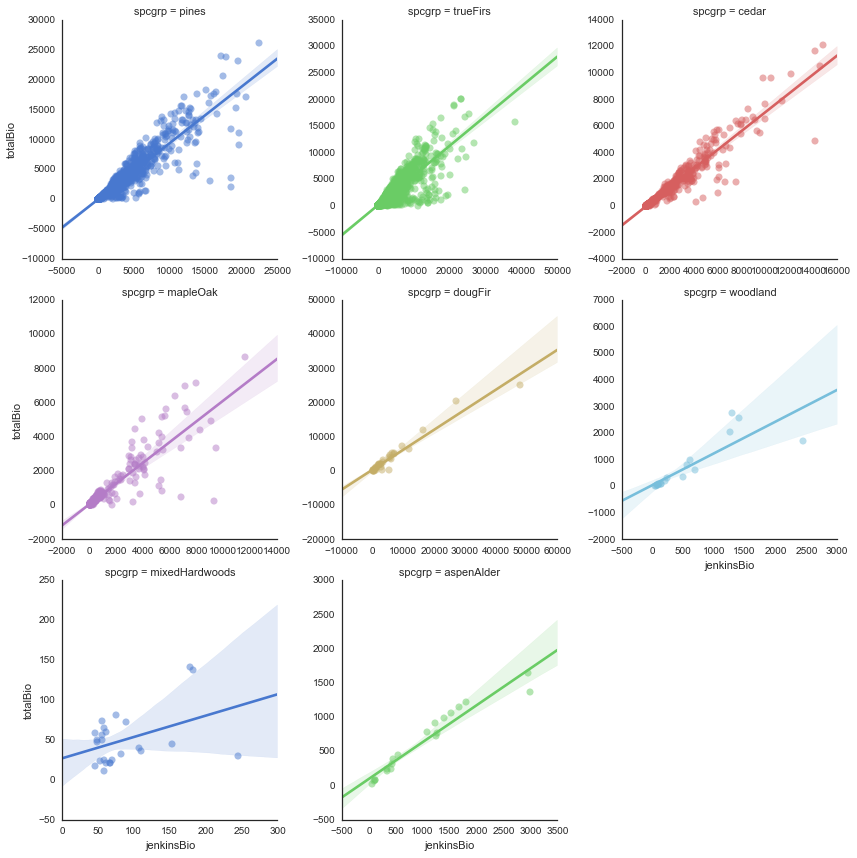

In [49]:
# Interested in some quick statistics comparing the FIA biomass to the Jenkins biomass
# one to one scatterplots of biomass by jenkins 2003 species group below:
sns.set_style('white')
lm = sns.lmplot(x="jenkinsBio", y="totalBio", col="spcgrp", hue="spcgrp", data=toUseTREES,
           col_wrap=3, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 0.5}, sharex=False,sharey=False)

# Total biomass fit statistics
mod = sm.OLS(toUseTREES.jenkinsBio, toUseTREES.totalBio, missing='drop')
res = mod.fit()
res.summary()

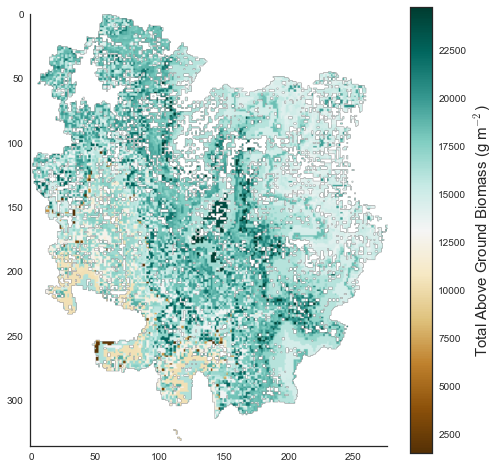

In [50]:
warnings.filterwarnings('ignore')
toUseTREES['adjustedBio'] = toUseTREES['totalBio'] / 4046.86 * 1000

biomap = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ECOREGION_PARAM/param_set_4/output/DinkeyScenario/replicate1/bioMAP/bio-TotalBiomass-0.img'
biomap20 = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ECOREGION_PARAM/Added20yrCohort/replicate1/bioMAP/bio-TotalBiomass-0.img'

biolist = [biomap, biomap20]
t0 = []
t1 = []
outputvar = [t0, t1]
idx = 0
for agbmap in biolist:
    src_ds = gdal.Open( agbmap )
    bioarray = src_ds.ReadAsArray()
    bioarray = bioarray.astype('float')
    bioarray[bioarray == 0] = np.nan
    masked_bio = np.ma.array (bioarray, mask=(np.isnan(bioarray)))
    outputvar[idx] = bioarray
    idx = idx + 1
    
sns.set_style('white')
plt.figure(figsize = (8,8))
plt.imshow(bioarray, cmap = 'BrBG')
sns.despine()
axx = plt.colorbar()
axx.set_label('Total Above Ground Biomass (g m$^{-2}$)', fontsize = 15)
bioarray = outputvar[0]
bioarray20 = outputvar[1]

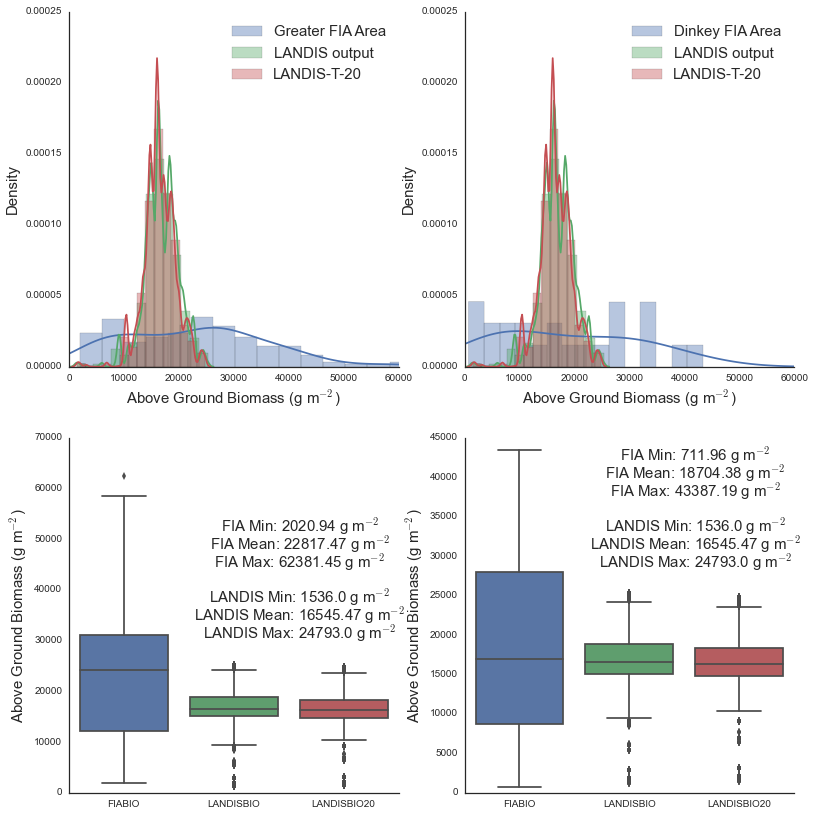

In [51]:
landis_bio = bioarray.ravel()
landis_bio20 = bioarray20.ravel()

fia_bio = toUseTREES.groupby('PLOT_ID').totalBio_peracre.sum().ravel()
fia_bio_dink = toUseTREES_Dink.groupby('PLOT_ID').totalBio_peracre.sum().ravel()

t1 = pd.DataFrame(dict(FIABIO = fia_bio, SOURCE = 'FIA'))
t1D = pd.DataFrame(dict(FIABIO = fia_bio_dink, SOURCE = 'LANDIS'))

t2 = pd.DataFrame(dict(LANDISBIO = landis_bio, LANDISBIO20 = landis_bio20, SOURCE = 'LANDIS'))

check = pd.concat([t1,t2],axis=0, ignore_index=True)
check_Dink = pd.concat([t1D,t2],axis=0, ignore_index=True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(13,14))
sns.distplot(check.FIABIO.dropna(), bins = 15, ax = ax1)
sns.distplot(check.LANDISBIO.dropna(), bins = 15, ax = ax1)
sns.distplot(check.LANDISBIO20.dropna(), bins = 15, ax = ax1)

ax1.set_xlim([0,60000])
ax1.set_xlabel('Above Ground Biomass (g m$^{-2}$)', fontsize = 15)
ax1.set_ylabel('Density', fontsize = 15)
ax1.legend(['Greater FIA Area','LANDIS output','LANDIS-T-20'], fontsize = 15)
sns.despine(ax = ax1)

sns.distplot(check_Dink.FIABIO.dropna(), bins = 15, ax = ax2)
sns.distplot(check_Dink.LANDISBIO.dropna(), bins = 15, ax = ax2)
sns.distplot(check_Dink.LANDISBIO20.dropna(), bins = 15, ax = ax2)

ax2.set_xlim([0,60000])
ax2.set_xlabel('Above Ground Biomass (g m$^{-2}$)', fontsize = 15)
ax2.set_ylabel('Density', fontsize = 15)
ax2.legend(['Dinkey FIA Area','LANDIS output','LANDIS-T-20'], fontsize = 15)
sns.despine(ax = ax2)


sns.boxplot(check, ax = ax3)
sns.despine(ax = ax3)
fia_meantext =  'FIA Mean: ' + str(round(np.mean(check.FIABIO.dropna()),2)) + ' g m$^{-2}$'
landis_meantext =  'LANDIS Mean: ' + str(round(np.mean(check.LANDISBIO20.dropna()),2)) + ' g m$^{-2}$'
fia_mintext =  'FIA Min: ' + str(round(np.min(check.FIABIO.dropna()),2)) + ' g m$^{-2}$'
landis_mintext =  'LANDIS Min: ' + str(round(np.min(check.LANDISBIO20.dropna()),2)) + ' g m$^{-2}$'
fia_maxtext =  'FIA Max: ' + str(round(np.max(check.FIABIO.dropna()),2)) + ' g m$^{-2}$'
landis_maxtext =  'LANDIS Max: ' + str(round(np.max(check.LANDISBIO20.dropna()),2)) + ' g m$^{-2}$'

ax3.text(0.7, 0.75,fia_mintext , ha='center', va='center', 
         transform=ax3.transAxes, fontsize = 15)
ax3.text(0.7, 0.7,fia_meantext , ha='center', va='center', 
         transform=ax3.transAxes, fontsize = 15)
ax3.text(0.7, 0.65,fia_maxtext , ha='center', va='center', 
         transform=ax3.transAxes, fontsize = 15)

ax3.text(0.7, 0.55,landis_mintext , ha='center', va='center', 
         transform=ax3.transAxes, fontsize = 15)
ax3.text(0.7, 0.5,landis_meantext , ha='center', va='center', 
         transform=ax3.transAxes, fontsize = 15)
ax3.text(0.7, 0.45,landis_maxtext , ha='center', va='center', 
         transform=ax3.transAxes, fontsize = 15)

ax3.set_ylabel('Above Ground Biomass (g m$^{-2}$)', fontsize = 15)


sns.boxplot(check_Dink, ax = ax4)
sns.despine(ax = ax4)
fia_meantext =  'FIA Mean: ' + str(round(np.mean(check_Dink.FIABIO.dropna()),2)) + ' g m$^{-2}$'
landis_meantext =  'LANDIS Mean: ' + str(round(np.mean(check_Dink.LANDISBIO20.dropna()),2)) + ' g m$^{-2}$'
fia_mintext =  'FIA Min: ' + str(round(np.min(check_Dink.FIABIO.dropna()),2)) + ' g m$^{-2}$'
landis_mintext =  'LANDIS Min: ' + str(round(np.min(check_Dink.LANDISBIO20.dropna()),2)) + ' g m$^{-2}$'
fia_maxtext =  'FIA Max: ' + str(round(np.max(check_Dink.FIABIO.dropna()),2)) + ' g m$^{-2}$'
landis_maxtext =  'LANDIS Max: ' + str(round(np.max(check_Dink.LANDISBIO20.dropna()),2)) + ' g m$^{-2}$'

ax4.text(0.7, 0.95,fia_mintext , ha='center', va='center', 
         transform=ax4.transAxes, fontsize = 15)
ax4.text(0.7, 0.9,fia_meantext , ha='center', va='center', 
         transform=ax4.transAxes, fontsize = 15)
ax4.text(0.7, 0.85,fia_maxtext , ha='center', va='center', 
         transform=ax4.transAxes, fontsize = 15)

ax4.text(0.7, 0.75,landis_mintext , ha='center', va='center', 
         transform=ax4.transAxes, fontsize = 15)
ax4.text(0.7, 0.7,landis_meantext , ha='center', va='center', 
         transform=ax4.transAxes, fontsize = 15)
ax4.text(0.7, 0.65,landis_maxtext , ha='center', va='center', 
         transform=ax4.transAxes, fontsize = 15)

ax4.set_ylabel('Above Ground Biomass (g m$^{-2}$)', fontsize = 15)
plt.savefig('biodistributions.tif')

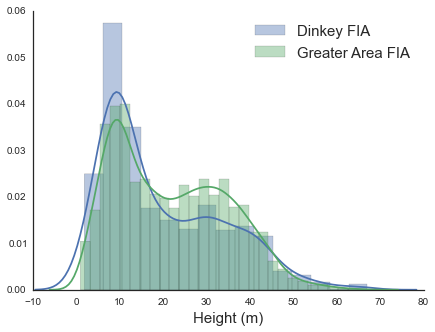

In [52]:
# Curious about the distributions of tree height between the Dinkey FIA plots and the 
# surrounding area FIA plots. More small trees are present in the Dinkey watershed plots
# relative to the surrounding area.

fig, (ax) = plt.subplots(1,1, figsize=(7,5))
sns.distplot(toUseTREES_Dink.HT*0.3048, ax = ax)
sns.distplot(toUseTREES.HT*0.3048, ax = ax)
ax.legend(['Dinkey FIA','Greater Area FIA'], fontsize=15)
ax.set_xlabel('Height (m)', fontsize=15)
sns.despine(ax = ax)

### Ageing the landscape to better match FIA data
#### Based on the plots above comparing FIA and LANDIS data, the median value of plots within the Dinkey Creek watershed best matched after 20 years post spin-up. That being said, we considered the option that our oldest cohorts across the landscape might need to be aged a bit to better match reality. My first approach was to add an additional cohort to the landscape, with an age of max_cohort_age + 20.

#### An additional challenge is that by adding an older cohort across the board, we run into the problem where sometimes we add a 'dead' cohort, because we violated the species longevity parameters. So we need to add a check and balance system. The most plastic way to do this is to read in the species file as a dataframe, and check each addition based on species name.

In [53]:
ic_filename = 'C:/Research/Dinkey_Creek/ic_dinkey_shrubs.txt'
new_ic_filename = 'C:/Research/Dinkey_Creek/ic_dinkey_shrubs_aged.txt'
speciesFile = 'C:/Research/Dinkey_Creek/DinkeySpecies.txt'
species = pd.read_csv(speciesFile, sep = '\t',skiprows = 4, header = None)
speciesList = species[0]
longevity = species[1]
checklist = pd.DataFrame(dict(species = speciesList, ages = longevity))

def group_by_heading( some_source ):
    buffer= []
    for line in some_source:
        if line.startswith( ">>" ):
            if buffer: yield buffer
            buffer= [ line, next(some_source) ]
        else:
            buffer.append( line )
    yield buffer

with open( ic_filename, "r" ) as source:
    with open(new_ic_filename, 'w') as dest:
        for heading_and_lines in group_by_heading( source ):
            heading= heading_and_lines[:2]
            lines= heading_and_lines[2:]
            for line in heading:
                dest.write(line)
            for cohort in np.arange(0,(len(lines))):
                # Write previous spaces for the sake of clarity
                if lines[cohort].startswith((' ', '\n')):
                    dest.write(lines[cohort])
                else:
                    numCohorts = len(lines[cohort].split()) - 1
                    oldestCohort = lines[cohort].split()[numCohorts]
                    cohortSpecies = lines[cohort].split()[0]
                    newOldestCohort = int(oldestCohort) + 20
                    # Make sure the new older cohort is below the maximum cohort age for the species
                    if newOldestCohort <= int(checklist[checklist.species == cohortSpecies].ages):
                        templine = lines[cohort] + ' ' + str(newOldestCohort)
                        finishedLine = templine.replace("\n", "") + '\n'
                        dest.write(finishedLine)
                    # Otherwise write the old cohort back into the new file
                    else:
                        dest.write(lines[cohort])


### Burning the landscape
#### To simulate fire and fire propagation across the watershed, we chose to use the dynamic fire and fuels extensions in LANDIS. The spatial inputs for the extensions were clipped from Shuang et al., 2015, and are described below

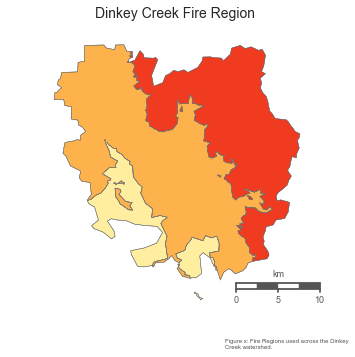

In [54]:
shp = fiona.open(wrkDir + 'DinkeyFireRegions_ll.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig3 = plt.figure(figsize = (6,6))
ax = fig3.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)
    
m.readshapefile(wrkDir + 'DinkeyFireRegions_ll', 'FireRegion',
    color='grey',
    zorder=2)

# set up a map dataframe
fireregion = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.FireRegion]})
for shape in enumerate(df_map['poly']):
    keys, values = m.FireRegion_info[shape[0]].keys(),m.FireRegion_info[shape[0]].values()
    fireregion.append(values[3])
df_map['FireRegion'] = fireregion
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

# Paint the features
# Colormap for elevation
EcoregionFC = ['#ffeda0', '#feb24c', '#f03b20']

idx = 0 # Colormap iterator
for feature in np.unique(df_map.FireRegion):
    ax.add_collection(PatchCollection(df_map.patches[df_map.FireRegion == feature], facecolor= EcoregionFC[idx]))
    idx = idx + 1
ax.set_title('Dinkey Creek Fire Region', fontsize = 14)
smallprint = ax.text(
    .65, 0,
    '''Figure x: Fire Regions used across the Dinkey
Creek watershed.''',
    size=6,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.015,
    coords[0], coords[1],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()

#### Describing the distribution of fire frequency and size across the Dinkey region. 
We chose a larger representative area from which to generate the distribution. Ultiamtely, we looked at two spatial data sets from the CalFire data to generate fire size and frequency statistics. In an effort to accurately represent the potential size distribution of fires in the Sierra, we included Yosemite to capture the Rim fire. This assured our max fire size would be large enough to permit the sorts of fires we think of as plausible across the region. For fire frequency however, including an area that extends too far north was generating too many fires annually. We decided to exclude Yosemite and areas north from the frequency distribution given the prominant lightning ignitions which we don't tend to realize in the Dinkey watershed.



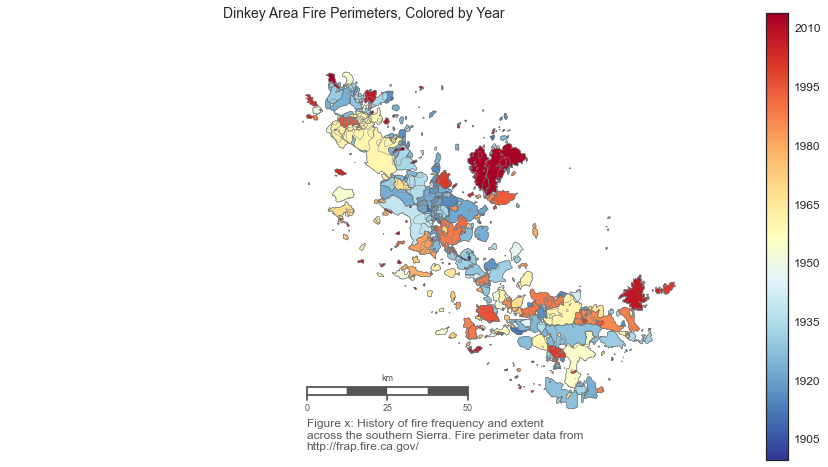

Range of colorbar is :1900 to 2014


In [65]:
shp = fiona.open(wrkDir + 'DinkeyMetroFires.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig3 = plt.figure(figsize = (16,16))
ax = fig3.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-121,llcrnrlat=36.5,urcrnrlon=-118.5,urcrnrlat=37.70,
             resolution='i', projection='aea', lat_0 = 37.62, lon_0 = -119.51)
    
m.readshapefile(wrkDir + 'DinkeyMetroFires', 'FireRegion',
    color='grey',
    zorder=2)

# set up a map dataframe
fireregion = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.FireRegion]})
for shape in enumerate(df_map['poly']):
    keys, values = m.FireRegion_info[shape[0]].keys(),m.FireRegion_info[shape[0]].values()
    fireregion.append(values[2])
df_map['FireRegion'] = fireregion
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

fireregion = map(int, fireregion)
#for feature in np.unique(df_map.FireRegion):
p = PatchCollection(df_map.patches,cmap=plt.get_cmap('RdYlBu_r'))
p.set_array(np.array(fireregion))
p.set_clim([np.ma.min(fireregion),np.ma.max(fireregion)])
cbar = plt.colorbar(p, shrink = 0.5)
cbar.ax.tick_params(labelsize=12) 

ax.add_collection(p)
ax.set_title('Dinkey Area Fire Perimeters, Colored by Year', fontsize = 14)
smallprint = ax.text(
    .42, 0,
    '''Figure x: History of fire frequency and extent
across the southern Sierra. Fire perimeter data from
http://frap.fire.ca.gov/''',
    size=12,
    color='#555555',
    transform=ax.transAxes)
# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.05,
    coords[0], coords[1],
    50.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()
print "Range of colorbar is :%s to %s"%(np.ma.min(fireregion),np.ma.max(fireregion))

In [75]:
metadata = pd.read_csv(wrkDir + 'DinkeyMetroFires_metadata.txt')
metadata = metadata[metadata.YEAR_ > 1983]
metadata.count() / 30

FID           6.533333
OBJECTID      6.533333
YEAR_         6.533333
STATE         6.533333
UNIT_ID       6.533333
FIRE_NUM      6.533333
FIRE_NAME     6.533333
AGENCY        6.533333
ALARM_DATE    6.533333
CONT_DATE     6.533333
C_METHOD      6.533333
CAUSE         6.533333
INC_NUM       6.533333
OBJECTIVE     6.533333
COMMENTS      6.533333
REPORT_AC     6.533333
GIS_ACRES     6.533333
Shape_Leng    6.533333
Shape_Area    6.533333
dtype: float64

scatter for data is 1.72441239438 when modeled and 1.97866407801 from data
mean of data is 3.12245962858 when modeled and 4.46866273808 from data
maximum fire size from the data in hectares: 9282.485125


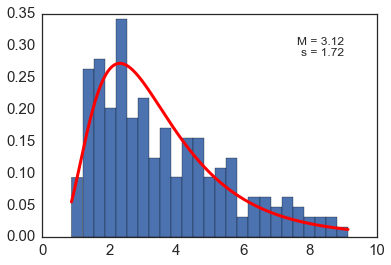

In [76]:
from scipy import stats
# Derive the mu and sigma params from CALFIRE data directly
# in LANDIS-II DFFS, mu and sigma are the location of mean and sd
# of the lognormal distributions -- therefore, we can do two things... 
# either take the mean of the natural log of the data, or fit a lognormal
# distribution to the log transformed data.
metadata = pd.read_csv(wrkDir + 'DinkeyMetroFires_metadata.txt')
# Data driven approach:
metadata['HECTARES'] = metadata.GIS_ACRES * 0.404686
firesizeMu = np.log(metadata.HECTARES).mean()
firesizeSd = np.log(metadata.HECTARES).std()
metadata = metadata[metadata.YEAR_ > 1983]
# Modeled approach:
# Limit fires to those > 1 ha
metadata.HECTARES[metadata.HECTARES < 1] = np.nan
firesize = np.log(metadata.HECTARES).dropna()
rvs = firesize # Generate some random variates as data
n, bins, patches = plt.hist(rvs, bins=25, normed=True) # Plot histogram

shape, loc, scale = stats.lognorm.fit(rvs, floc=0) # Fit a curve to the variates
mu = np.log(scale) # Mean of log(X)
sigma = shape # Standard deviation of log(X)
M = np.exp(mu) # Geometric mean == median
s = np.exp(sigma) # Geometric standard deviation

# Plot figure of results
x = np.linspace(rvs.min(), rvs.max(), num=400)
plt.plot(x, stats.lognorm.pdf(x, shape, loc=0, scale=scale), 'r', linewidth=3) # Plot fitted curve
ax = plt.gca() # Get axis handle for text positioning
txt = plt.text(0.9, 0.9, 'M = %.2f\ns = %.2f' % (M, s), horizontalalignment='right', 
                size='large', verticalalignment='top', transform=ax.transAxes)
print "scatter for data is %s when modeled and %s from data" %(s, firesizeSd)
print "mean of data is %s when modeled and %s from data" %(M, firesizeMu)  
print "maximum fire size from the data in hectares: %s" %metadata.HECTARES.max()

### Looking at some of the output from the LANDIS runs with and without fire, with varying degrees of ProbabilityOfEstablishment

### PDF Generating plotting function for all time series data in the century output

In [57]:
from matplotlib.backends.backend_pdf import PdfPages
EcoregionFC = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3',
               '#c7eae5', '#80cdc1','#35978f', '#01665e']

def plotCenturyOutput(inputDir, centFile, monthlyCentFile, simname, rep):
    cent = pd.read_csv(inputDir + centFile)
    cent['rep'] = rep
    centM = pd.read_csv(inputDir + monthlyCentFile)
    centM['rep'] = rep

    # Static vars for now, given that the century output is fairly regular
    centM_vars = ['ppt','airtemp','avgNPPtc','avgResp','avgNEE','Ndep','StreamN']
    cent_vars = cent.columns[4:59]

    pp = PdfPages(simname + '_centuryOut_' + str(rep) + '.pdf')
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize =(7, 11))
    axs = f.axes
    idxx = 0
    for var in cent_vars:
        idx = 0
        for eco in np.unique(cent.EcoregionName):
            ax = axs[idxx]
            toplot = cent[cent.EcoregionName == eco]
            index = pd.date_range('2000-1-1', periods=len(toplot), freq='A')
            toplot.index = index
            toplot[var].plot(color=EcoregionFC[idx], marker='o',
                           ax = ax)
            idx = idx + 1
            
        ax.set_title(var)


        idxx = idxx + 1
        if idxx > 5:
            pp.savefig()
            plt.close();
            f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize =(7, 11))
            axs = f.axes
            idxx = 0
    plt.close();
    pp.close()

    pp = PdfPages(simname + '_centuryOut_Monthly_' + str(rep) + '.pdf')
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize =(13, 10))
    axs = f.axes
    idxx = 0
    for var in centM_vars:
        idx = 0
        for eco in np.unique(centM.EcoregionName):
            ax = axs[idxx]
            toplot = centM[centM.EcoregionName == eco]
            index = pd.date_range('2000-1-1', periods=len(toplot), freq='M')
            toplot.index = index
            toplot[var].plot(color=EcoregionFC[idx],
                           ax = ax)
            idx = idx + 1 
        ax.set_title(var)


        idxx = idxx + 1
        if idxx > 3:
            pp.savefig()
            plt.close();
            f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize =(13, 10))
            axs = f.axes
            idxx = 0
    pp.savefig()
    plt.close();
    pp.close()
    return cent, centM

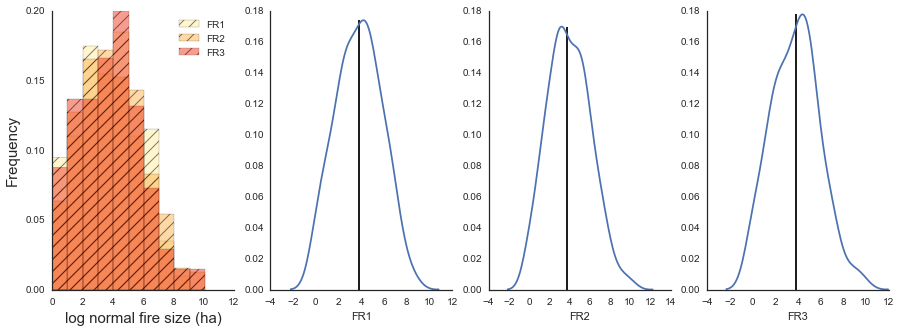

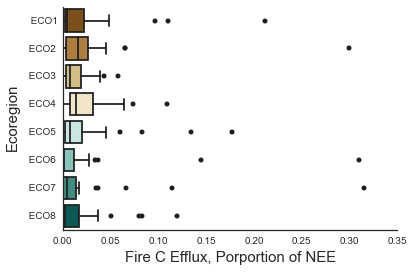

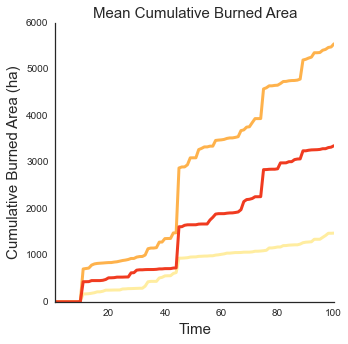

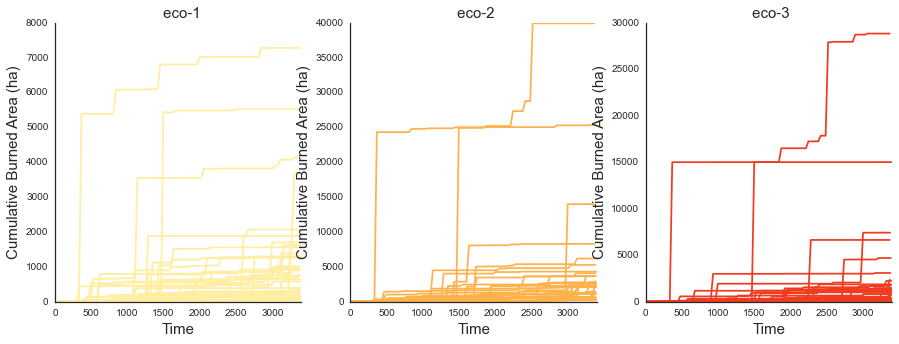

In [61]:
## Soon to be wrapped up in a printing function -- quick diagnostic for fire size and severity metrics
sims = ['FireP_est1_FuncOverhaul']
reps = [1,2,3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
dffsLog = 'dynamic-fire-test-log.csv'
dffsSummary = 'fire/summary-log.csv'
centFileName = 'Century-succession-log.csv'
FireregionFC = ['#ffeda0', '#feb24c', '#f03b20']
propfire = []
fireeco = []
sns.set_style('white')
for simname in sims:
    counter = 0
    for rep in reps:
        wkDir_c = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/' + simname + '/output/DinkeyScenario2/replicate' + str(rep) + '/'
        flog = pd.read_csv(wkDir_c + dffsSummary)
        firedata = pd.read_csv(wkDir_c + dffsLog)
        centdata = pd.read_csv(wkDir_c + centFileName)
        for region in np.unique(centdata.EcoregionName):
            centsub = centdata[centdata.EcoregionName == region]
            Femission = centsub.FireCEfflux.sum()
            NEE = centsub.NEEC.sum()            
            propfire.append(-(Femission / NEE))
            fireeco.append(region)
            firedata['rep'] = rep
            flog['rep'] = rep
            firelog = flog[1:len(flog)]
        if counter == 0:
            firedataTot = firedata
            firedataTS = firedata
            firelogTot = firelog
           
        else:
            firedataTot = pd.concat((firedataTot, firedata))
            firedataTS = pd.concat((firedataTS, firedata))
            firelogTot = pd.concat((firelogTot, firelog))

        counter = counter + 1
    F_contrib = pd.DataFrame(dict(ECO = fireeco, PROP = propfire))
    firedataTot[firedataTot == 0] = np.nan
    f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize =(15,5))
    sizedist = pd.DataFrame(dict(FR1 = firedataTot['eco-1'], 
                                 FR2 = firedataTot['eco-2'], 
                                 FR3 = firedataTot['eco-3']))
    np.log(sizedist).plot(ax = ax1, kind = 'hist', normed = True, 
                          bins = 10, hatch='//', stacked = False, 
                          alpha = 0.5, color = FireregionFC)
    ax1.set_ylabel('Frequency', fontsize = 15)
    ax1.set_xlabel('log normal fire size (ha)', fontsize = 15)
    p = sns.distplot(np.log(sizedist.FR1),hist=False, ax = ax2)
    x,y = p.get_lines()[0].get_data()
    ax2.vlines(x = np.mean(np.log(sizedist.FR1)), ymin = 0, 
               ymax = max(y))
    p = sns.distplot(np.log(sizedist.FR2),hist=False, ax = ax3)
    x,y = p.get_lines()[0].get_data()
    ax3.vlines(x = np.mean(np.log(sizedist.FR1)), ymin = 0, 
               ymax = max(y))
    p=sns.distplot(np.log(sizedist.FR3),hist=False, ax = ax4)
    x,y = p.get_lines()[0].get_data()
    ax4.vlines(x = np.mean(np.log(sizedist.FR1)), ymin = 0, 
               ymax = max(y))
    sns.despine()
    f = plt.figure()
    flierprops = dict(marker='o', markersize=5)
    fig = sns.boxplot(x = 'PROP', y = 'ECO', data = F_contrib, 
                      palette=EcoregionFC, flierprops = flierprops)
    sns.set_context('notebook')
    axes = fig.axes
    axes.set_xlim(0, 0.35)
    axes.set_xlabel('Fire C Efflux, Porportion of NEE', fontsize = 15)
    axes.set_ylabel('Ecoregion', fontsize = 15)

    sns.despine()
    
flogTot = firelogTot.groupby(['TimeStep']).mean()
sd = firelogTot.groupby(['TimeStep']).std()
flogTotR = firelogTot.groupby(['TimeStep', 'rep']).mean().reset_index()

f, ax = plt.subplots(1,1, figsize =(5,5))
idx = 0
for region in [' eco-1',' eco-2',' eco-3']:
    toplot = flogTot[region].cumsum()

    toplot.plot(ax = ax, color = FireregionFC[idx], lw = 3)
    ax.set_title('Mean Cumulative Burned Area', fontsize = 15)
    ax.set_xlabel('Time', fontsize = 15)
    ax.set_ylabel('Cumulative Burned Area (ha)', fontsize = 15)
    idx = idx + 1
sns.despine()

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize =(15,5))
axs = f.axes
idx = 0

for replicate in np.unique(flogTotR.rep):
    flogTot_R = flogTotR[flogTotR.rep == replicate]
    idx = 0
    for region in [' eco-1',' eco-2',' eco-3']:
        toplot = flogTot_R[region].cumsum()
        ax = axs[idx]
        toplot.plot(ax = ax, color = FireregionFC[idx])
        ax.set_xlabel('Time', fontsize = 15)
        ax.set_ylabel('Cumulative Burned Area (ha)', fontsize = 15)
        ax.set_title(region, fontsize = 15)
        idx = idx + 1
    sns.despine()


### Fire severity map
In order to move forward with picking specific manaagement strategies for the Dinkey watershed landscape, I need to develop baseline fire severity maps -- basically surfaces which on aggregate show where each of the fires in the Dinkey watershed occurred over the numerous replicates we conduct. Wrapping this up in a function is going to be useful for making a variety of map types... so this needs to be generalized in time.

#### Update
Given that I've got a handle on the historic and severe fire weather inputs, I wrapped up the severity map generation workflow into a function, so we can quickly look at the fire outputs from various model runs. The function makes some assumptions about the structure of the LANDIS-II output, with respect to directory and output names. The overall workflow is to query a scenario name (a directory on the NAS) for the number of replicates. Then iterate over the replicates, and load in the fire severity data using gdal and numpy to handle the rasters. Another assumption here is that the data are annual, and the simulation length is 100 years. We cumulate each severity map, and take the mean by pixel over the 100 year term. We then add these means across replicates, and finally take the mean of all replicates for the final severity map.

Note here that we set all pixels < 3 to 0, because these areas didn't burn. This lets us rescale the final output in terms of LANDIS-II fire severity (1-5). 


In [2]:
def severityMapGen(dataDir, simname):
    timesteps = np.linspace(1,100,100)
    wkDir_reps =  dataDir + simname + \
                    '/output/DinkeyScenario/'
    num_replicates = len(next(os.walk(wkDir_reps))[1])
    reps = np.arange(1,num_replicates+1,1)
    idx = 0
    for rep in reps:
        counter = 0
        for time in timesteps:            
            wkDir_data = wkDir_reps + 'replicate' + str(rep) + '/' + 'fire/'
            sevmap = 'severity-' + str(int(time)) + '.img'
            src_ds = gdal.Open( wkDir_data + sevmap )                        
            sevarray = src_ds.ReadAsArray()
            sevarray = sevarray.astype('float')
            sevarray[sevarray < 3] = 0
            if counter == 0:
                cumulative_sevmap = sevarray
            else:
                cumulative_sevmap = cumulative_sevmap + sevarray
            counter = counter + 1                
        if idx == 0:
            finalmap = cumulative_sevmap
        else:
            finalmap = finalmap + cumulative_sevmap
        idx = idx + 1
    finalmap = finalmap / num_replicates
    finalmap[finalmap == 0] = np.nan
    masked_sev = np.ma.array (finalmap, mask=(np.isnan(finalmap)))
    return masked_sev


#### Century output ensemble generation
Quick function to step through a simulation and grab all of the apropriate replicates, and generate a cumulative datarame. Currently does nothing more than output an annual (or whatever timestep century runs) and corresponding monthly file. The replicate is carried through into the final dataframe, and averaging or ensemble generation can be conducted on the output at a later time

In [93]:
def centOutputGen(dataDir, simname):
    wkDir_reps =  dataDir + simname + \
                    '/output/DinkeyScenario/'
    print wkDir_reps
    centFileName = 'Century-succession-log.csv'
    centFileNameM = 'Century-succession-monthly-log.csv'
    num_replicates = len(next(os.walk(wkDir_reps))[1])
    reps = np.arange(1,num_replicates+1,1)
    idx = 0
    for rep in reps:
        wkDir_data = wkDir_reps + 'replicate' + str(rep) + '/'
        cent = pd.read_csv(wkDir_data + centFileName)
        cent['rep'] = rep
        centM = pd.read_csv(wkDir_data + centFileNameM)
        centM['rep'] = rep
        if idx == 0:
            centTot = cent
            centTotM = centM

        else:
            centTot = pd.concat((centTot, cent))
            centTotM = pd.concat((centTotM, centM))
        idx = idx + 1
    return centTot, centTotM


#### Historic and severe fire weather severity map comparison
Using the functions above, we can look at the mean difference between fire severity for both historic and severe fire weather conditions. The number of replicates at this point is different between scenarios.


In [54]:
dataDir = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/'
simname = 'FireP_est1_FuncOverhaul-WSCOR-HiFire'
severityMap_SFW = severityMapGen(dataDir, simname)

dataDir = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/'
simname = 'FireP_est1_FuncOverhaul-WSCOR'
severityMap_HFW = severityMapGen(dataDir, simname)

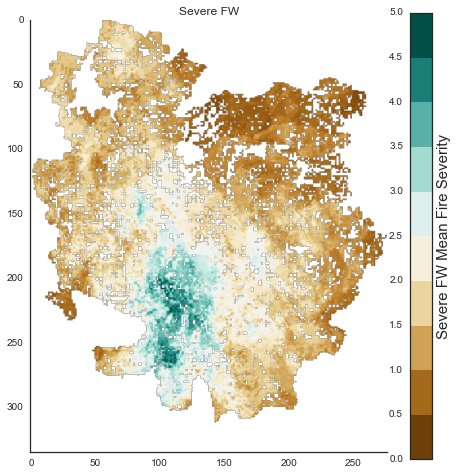

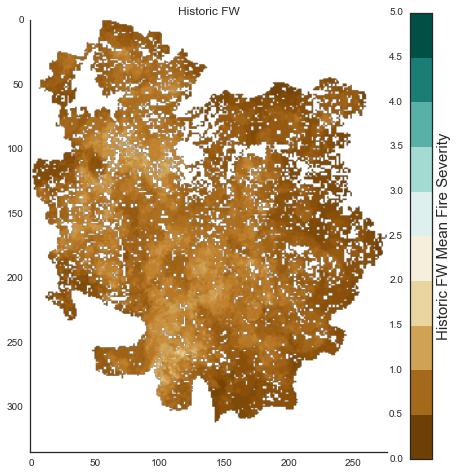

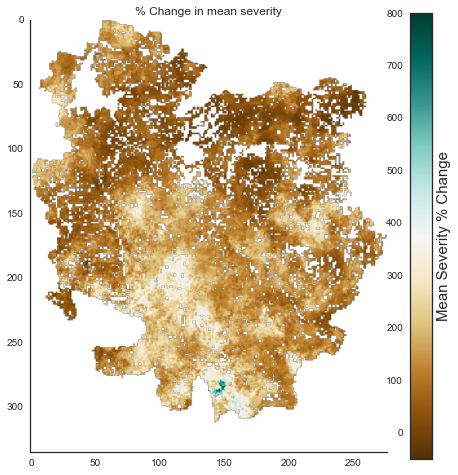

In [132]:
plt.figure(figsize = (8,8))
plt.imshow(severityMap_SFW, cmap = 'BrBG', vmin = 0, vmax = 5)
plt.title('Severe FW')
axx = plt.colorbar(boundaries=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
 ticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
axx.set_label('Severe FW Mean Fire Severity', fontsize = 15)
sns.set_style('white')
sns.despine()    

plt.figure(figsize = (8,8))
plt.imshow(severityMap_HFW, cmap = 'BrBG', vmin = 0, vmax = 5)
plt.title('Historic FW')
axx = plt.colorbar(boundaries=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
 ticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
axx.set_label('Historic FW Mean Fire Severity', fontsize = 15)
sns.set_style('white')
sns.despine()    

plt.figure(figsize = (8,8))
plt.imshow(((severityMap_SFW - severityMap_HFW) / (severityMap_HFW)) * 100, cmap = 'BrBG')
plt.title('% Change in mean severity')
axx = plt.colorbar()
axx.set_label('Mean Severity % Change', fontsize = 15)
sns.set_style('white')
sns.despine()    


#### Ecosystem NEE, TEC
Need to work these into plotting functions -- still WIP, biomass trajectory maps by species and ecoregion

In [94]:

centTot_HF, centTotM_HF = centOutputGen(dataDir, 'FireP_est1_FuncOverhaul-WSCOR')
centTot_SF, centTotM_SF = centOutputGen(dataDir, 'FireP_est1_FuncOverhaul-WSCOR-HiFire')

ax = plt.figure(figsize=(4,6))
toplotHF = centTot_HF
toplotHF['TEC'] = (toplotHF['SOMTC'] + toplotHF['AGB']* 0.5 ) * 0.01
toplotg = toplotHF.groupby('Time').mean()
sd = toplotHF.groupby('Time').std()
index = pd.date_range('2000-1-1', periods=len(toplotg), freq='10A')
toplotg.index = index
sd.index = index

mu_hf = toplotg.TEC
sd_hf = sd.TEC
x_hf = toplotg.index
toplotg['TEC'].plot(color= 'blue', marker='o')

toplotSF = centTot_SF
toplotSF['TEC'] = (toplotSF['SOMTC'] + toplotSF['AGB'] * 0.5)  * 0.01
toplotg = toplotSF.groupby('Time').mean()
sd = toplotSF.groupby('Time').std()
index = pd.date_range('2000-1-1', periods=len(toplotg), freq='10A')
toplotg.index = index
sd.index = index

mu_sf = toplotg.TEC
sd_sf = sd.TEC
x_sf = toplotg.index

toplotg['TEC'].plot(color= 'red', marker='o')
plt.fill_between(x, mu_sf+sd_sf, mu_sf-sd_sf, alpha = 0.3, color = 'red')
plt.fill_between(x, mu_hf+sd_hf, mu_hf-sd_hf, alpha = 0.3, color = 'blue')
plt.ylabel('Total Ecosystem Carbon (MgC ha $^{-1}$)', fontsize = 15)
plt.xlabel('Simulation Year', fontsize = 15)
plt.legend(['Historic FW', 'Severe FW'], loc = 'upper left', fontsize = 12)
sns.despine()


ax = plt.figure(figsize=(4,6))
toplotHF = centTot_HF
toplotg = toplotHF.groupby('Time').mean()
sd = toplotHF.groupby('Time').std()
index = pd.date_range('2000-1-1', periods=len(toplotg), freq='10A')
toplotg.index = index
sd.index = index

mu_hf = toplotg.AGB * 0.01
sd_hf = sd.AGB * 0.01
x_hf = toplotg.index
toplotg['AGB'] = toplotg['AGB'] * 0.01
toplotg['AGB'].plot(color= 'blue', marker='o')

toplotSF = centTot_SF
toplotg = toplotSF.groupby('Time').mean()
sd = toplotSF.groupby('Time').std()
index = pd.date_range('2000-1-1', periods=len(toplotg), freq='10A')
toplotg.index = index
sd.index = index

mu_sf = toplotg.AGB * 0.01
sd_sf = sd.AGB * 0.01
x_sf = toplotg.index
toplotg['AGB'] = toplotg['AGB'] * 0.01
toplotg['AGB'].plot(color= 'red', marker='o')
plt.fill_between(x, mu_sf+sd_sf, mu_sf-sd_sf, alpha = 0.3, color = 'red')
plt.fill_between(x, mu_hf+sd_hf, mu_hf-sd_hf, alpha = 0.3, color = 'blue')
plt.ylabel('Above Ground Biomass (Mg ha $^{-1}$)', fontsize = 15)
plt.xlabel('Simulation Year', fontsize = 15)
plt.legend(['Historic FW', 'Severe FW'], loc = 'upper left', fontsize = 12)
sns.despine()

Z:/Dan K/DinkeyCreek/LANDIS_RUNS/Production/FireP_est1_FuncOverhaul-WSCOR/output/DinkeyScenario/


StopIteration: 

In [ ]:
# Now we can generate quick diagnostic plots for every century variable for each run -- currently there
# is no averaging across replicates, but the framework is in place to add it in the near future.
# No descriptive stats are output yet either, that will follow shortly
sims = ['FireP_est1_FuncOverhaul-WSCOR']
reps = [1,2,3,4,5,6,7,8,9,10]
centFileName = 'Century-succession-log.csv'
centFileNameM = 'Century-succession-monthly-log.csv'

for simname in sims:
    count = 0
    for rep in reps:
        wkDir_c = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/' + simname + '/output/DinkeyScenario/replicate' + str(rep) + '/'
        [cent, centM] = plotCenturyOutput(wkDir_c, centFileName, centFileNameM, simname, rep)
        if count == 0:
            centTot = cent
            centTotM = centM

        else:
            centTot = pd.concat((centTot, cent))
            centTotM = pd.concat((centTotM, centM))
        count = count + 1
        
cent_vars = ['SOMTC','AGB']


ax = plt.figure()
idx = 0

toplot = centTot
toplotg = toplot.groupby('Time').mean()
sd = toplot.groupby('Time').std()

index = pd.date_range('2000-1-1', periods=len(toplotg), freq='10A')
toplotg.index = index
sd.index = index
toplotg['TEC'] = toplotg['SOMTC'] + toplotg['AGB'] * 0.5
toplotg['TEC'].plot(color=EcoregionFC[idx], marker='o')
idx = idx + 1

plt.title('TEC')

### Moving on from wildfire
#### At this point we've got the landscape decently paramterized, and have a host of functions written to quickly scope the output from the model in replicate. Now we need to setup fuels treatments for thinning and wildfire prescriptions. The  first step was to grab the CALVGEG data and create LANDIS-II management regions based on the several distinct forest types prevalent in the watershed.

### Calveg Layers
#### I used the existing vegetation layers from the CALVEG survey 2000-2008 to create a dissolved version of the frequent fire classes of interest. The result was 5 active management units, and a 6th unit with no treatments applied (barren, water, etc.). I grouped CALVEG life forms using plant codes from the NRCS database (specific dissolve groupings described in ManagementClasses.xlsx), and then performed a 3x3 majority filter over the reclassified raster to create more contiguous regions.

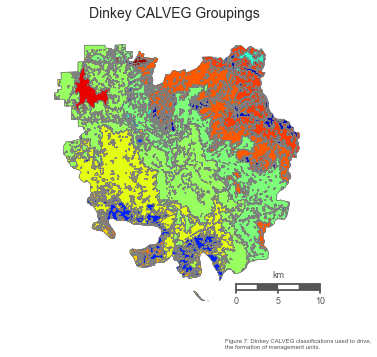

In [87]:
from matplotlib import cm

start = 0
stop = 1
number_of_lines= 33
cm_subsection = np.linspace(start, stop, number_of_lines) 
vegtypes = [ cm.jet(x) for x in cm_subsection ]

shp = fiona.open(wrkDir + 'DinkeyCalveg_dissolved_preraster_pro.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

fig2 = plt.figure(figsize = (6,6))
ax = fig2.add_subplot(111, frameon = False)

m = Basemap(llcrnrlon=-119.4,llcrnrlat=36.85,urcrnrlon=-118.95,urcrnrlat=37.2,
             resolution='i', projection='tmerc', lat_0 = 37.1, lon_0 = -119.3)
    
m.readshapefile(wrkDir + 'DinkeyCalveg_dissolved_preraster_pro', 'mgmt',
    color='grey',
    zorder=2)

# set up a map dataframe
mgmtunit = []
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.mgmt]})
for shape in enumerate(df_map['poly']):
    keys, values = m.mgmt_info[shape[0]].keys(),m.mgmt_info[shape[0]].values()
    mgmtunit.append(values[2])
df_map['MgmtUnit'] = mgmtunit
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x, ec='#787878', lw=.25))

# Paint the features
# Colormap for elevation
#ParentGFC = ['#e5f5f9','#99d8c9','#2ca25f']
idx = 0 # Colormap iterator
forLegend = []
for feature in np.unique(df_map.MgmtUnit):
    ax.add_collection(PatchCollection(df_map.patches[df_map.MgmtUnit == feature], facecolor= vegtypes[idx]))
    idx = idx + 1
ax.set_title('Dinkey CALVEG Groupings', fontsize = 14)
smallprint = ax.text(
    .65, 0,
    '''Figure 7: Dinkey CALVEG classifications used to drive,
the formation of management units.''',
    size=6,
    color='#555555',
    transform=ax.transAxes)
# Draw a map scale
m.drawmapscale(
    coords[0] + 0.3, coords[1] + 0.015,
    coords[0], coords[1],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.show()

#### The 33 classes displayed above are by and large 6-7 distinct groups, of which only 5 qualify as frequent fire systems requiring management. The finalized management unit map below shows the groupings according to the 5 veg layers which the treatments will affect.

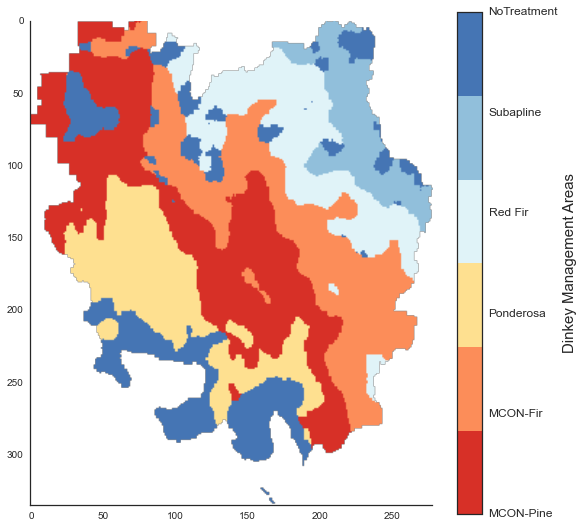

In [88]:
# Following a reclassification and majority filter, the above map becomes the management unit layer:
from matplotlib import colors

biomap = wrkDir + 'DinkeyMgmt1.tif'
src_ds = gdal.Open( biomap )
bioarray = src_ds.ReadAsArray()
bioarray = bioarray.astype('float')
bioarray[bioarray == 0] = np.nan
masked_bio = np.ma.array (bioarray, mask=(np.isnan(bioarray)))
mgmtColors = ['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
cmapS = colors.ListedColormap(mgmtColors)
sns.set_style('white')
fig, ax = plt.subplots(figsize = (9,9))
cax = ax.imshow(bioarray, cmap = cmapS)
sns.despine()
axx = fig.colorbar(cax, ticks=[1,2,3,4,5,6])
axx.ax.set_yticklabels(['MCON-Pine', 'MCON-Fir', 'Ponderosa','Red Fir','Subapline','NoTreatment'], fontsize = 12)
axx.set_label('Dinkey Management Areas', fontsize = 15)


### Quick note about management unit rasters, and raster inputs to LANDIS in general
Often after using a GIS to generate a raster like the above output, all sorts of errors will arise from attempted model runs. Some of the more prevalent errors arise from the following problems.<p>
1) assure the row and col number of the raster have not changed, and if they, the fix is simply re-exporting the raster with specified row/col dimensions. <p>
2) changes to the 'no data' value -- this can be a pain in the butt to resolve in a GIS, much easier to identify the 'no data' value, and use a programmatic solution, e.g., raster[raster == 'nodata'] = 0. In the example below, I determined the no data value to be 65535 in QGIS, and just re-wrote the raster using GDAL. This is the easiest way to keep whatever GIS is used from mucking with the raster format / dimensions etc.

In [104]:
mgmt = wrkDir + 'DinkeyMgmt_uINT16.tif'
src_ds = gdal.Open( mgmt )
mgmt_unit = src_ds.ReadAsArray()
mgmt_unit = mgmt_unit.astype('int')
mgmt_unit[mgmt_unit > 6] = 0
driver = gdal.GetDriverByName('GTiff')
ds = driver.Create(wrkDir + 'DinkeyMgmtPy.tif',
                   277, 335, 1, gdal.GDT_Byte)
ds.GetRasterBand(1).WriteArray(mgmt_unit)
ds.FlushCache()

### Parameterizing the fuels treatments
#### Now that the management areas are defined, we need to describe the fuels treatments to each area. We will be simulating RxFire as well as thinning. Decided to conduct a series of single cell runs for each management unit, to sort out how the thinning and RxFire affect the model output, and to see if we can find a reasonable perscription by species type. The only variation between theses runs is the initial communites file, which I ballparked based on the representative species we want to manage within each unit.

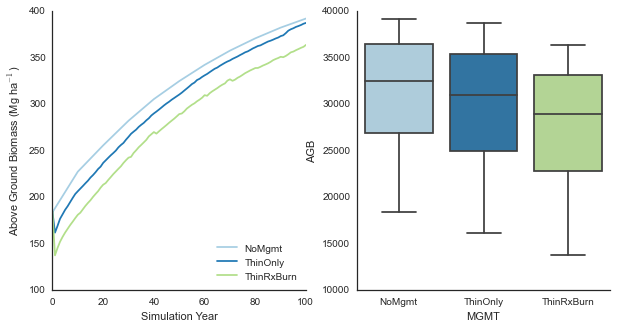

In [5]:
# Output a quick set of diagnostics for the thinning treatments
# Single cell working dir
sims = ['MCON-PINE_NoMGMT', 'MCON-PPINE_ThinOnly', 'MCON-PINE_ThRxBurn']
CCellDir = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/SingleCell_MgmtParam/'
centlog = 'century-succession-log.csv'
sppBio = 'spp-biomass-log.csv'
idx = 0
for sim in sims:  
    cent = pd.read_csv(CCellDir + sim + '/' + centlog)
    sppbio = pd.read_csv(CCellDir + sim + '/' + sppBio)
    cent['MGMT'] = sim
    sppbio['MGMT'] = sim
    if idx == 0:
        centTot = cent
        sppTot = sppbio
    else:
        centTot = pd.concat([centTot, cent])
        sppTot = pd.concat([sppTot, sppbio])
    idx = idx + 1
f, ((ax1, ax2)) = plt.subplots(1,2, figsize =(10,5))
idx = 0
agbcolors = ['#a6cee3','#1f78b4','#b2df8a']
for mgmt in sims:
    dinkMgmt = centTot[centTot.MGMT == mgmt]
    dinkMgmt.AGB = dinkMgmt.AGB * 0.01
    dinkMgmt.plot(ax = ax1, x = 'Time', y = 'AGB', color = agbcolors[idx])
    idx = idx + 1
ax1.legend(['NoMgmt','ThinOnly','ThinRxBurn'], loc = 4)
ax1.set_xlabel('Simulation Year')
ax1.set_ylabel('Above Ground Biomass (Mg ha$^{-1}$)')
g = sns.boxplot(ax = ax2, x = 'MGMT', y = 'AGB', data = centTot, palette = ['#a6cee3','#1f78b4','#b2df8a'])
#sns.swarmplot(ax = ax2, x = 'MGMT', y = 'AGB', data = centTot) NEED to update seaborn
g.set(xticklabels=['NoMgmt','ThinOnly','ThinRxBurn'])
sns.despine()
sns.set_style('white')

#### Creating a stand map
I'm not aware of any succinct manner of doing this, so I'll start a function that I can build on in the future, to develop a stand map from existing LANDIS inputs, like a management unit map, ecoregion, and initial communities. The first pass here will simply take a management unit map, and turn each pixel's value into a unique integer, starting at 1 and increasing to the number total pixels in the raster. Future functionality will permit resampling of the stand size by species type, or ecoregion, or both.

In [49]:
def genStandMap(src_dir, base_map_name, stands_map_name):
    # Load in the IC file
    baseMapPath = src_dir + base_map_name
    src_ds = gdal.Open( baseMapPath )
    baseMap = src_ds.ReadAsArray()

    # Create an 'inactive' mask from the 0 values in the IC map
    baseMap[baseMap > 0] = 1

    # Get dimensions for stand map, create a raster with values
    # that range from 1 - the number of cells
    rows = int(baseMap.shape[0])
    cols = int(baseMap.shape[1])
    cellID = np.arange(rows * cols)
    cellID = cellID.reshape(rows,cols) + 1

    # Apply the binary mask
    standMap = cellID * baseMap

    # Get a geotiff driver and write the raster
    driver = gdal.GetDriverByName('GTiff')
    ds = driver.Create(src_dir + stands_map_name + '.tif',
                   cols, rows, 1, gdal.GDT_Int32)
    ds.GetRasterBand(1).WriteArray(standMap)
    ds.FlushCache()

Quickly test the function and output a stand map

In [50]:
simDir = 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\\'
MGMTMap = 'MgmtRedux.tif'
genStandMap(simDir, MGMTMap, 'DinkeyStandsv2')

### Looking at more century output
Need to create a good few functions for aggregating and plotting century data.

At this point we are simulating the landscape with historic and severe fire weather, as well as with only mechanical thinning as management, and with thinning and prescribed burning -- again with both historic and severe fire weather. Results here will give us an idea of whether or not we need to tweak treatments, and begin to establish the narrative for the mansucripts that will follow.

In [10]:
# We need to modify the structure of our Century output aggregating function,
# given that there is now a more final data structure for output on the server.
# Modified to also output from the spp-biomass-log file.
def centOutputGen(dataDir, simname):
    wkDir_reps =  dataDir + simname + '/'
    centFileName = 'Century-succession-log.csv'
    centFileNameM = 'Century-succession-monthly-log.csv'
    sppBioName = 'spp-biomass-log.csv'

    repnames = next(os.walk(wkDir_reps))[1]
    num_replicates = len(repnames)

    idx = 0
    for rep in repnames:
        repnum = rep.split('replicate')[1]
        wkDir_data = wkDir_reps + 'replicate' + repnum + '/'
        cent = pd.read_csv(wkDir_data + centFileName)
        cent['rep'] = int(repnum)
        centM = pd.read_csv(wkDir_data + centFileNameM)
        centM['rep'] = int(repnum)
        sppBio = pd.read_csv(wkDir_data + sppBioName)
        sppBio['rep'] = int(repnum)

        if idx == 0:
            centTot = cent
            centTotM = centM
            sppBioTot = sppBio

        else:
            centTot = pd.concat((centTot, cent))
            centTotM = pd.concat((centTotM, centM))
            sppBioTot = pd.concat((sppBioTot, sppBio))

        idx = idx + 1
    return centTot, centTotM, sppBioTot


def genCentWeightedMeansDF(aggregatedAnnualCentFile, simName):
    simCentDF = aggregatedAnnualCentFile
    # ------- Create new vars in Cent file and handle unit conversion ------- #
    simCentDF['TEC'] = (simCentDF['SOMTC'] + simCentDF['AGB']* 0.5 ) * 0.01 # Add total ecosystem carbon, Mg/ha
    simCentDF['AGBc'] = simCentDF['AGB']* 0.5 * 0.01 # Convert AGB from g /m^2 biomass to Mg/ha C
    simCentDF['NEEC'] = simCentDF['NEEC'] * -1 # Convert NEE sign convention
    simCentDF['NECB'] = simCentDF['NEEC'] - simCentDF['FireCEfflux']
    activeArea = simCentDF.NumSites.unique().sum() # Calculate total sites in the simulation

    # ------- Generate mean and std of weighted ecoregion data ------- #
    simCentDF['TECw'] = simCentDF.TEC * (simCentDF.NumSites / activeArea)
    simCentDF['AGBw'] = simCentDF.AGBc * (simCentDF.NumSites / activeArea)
    simCentDF['NEECw'] = simCentDF.NEEC * (simCentDF.NumSites / activeArea)
    simCentDF['FireCEffluxw'] = simCentDF.FireCEfflux * (simCentDF.NumSites / activeArea)
    simCentDF['NECBw'] = simCentDF.NECB * (simCentDF.NumSites / activeArea)
    
    naiveMean = simCentDF.groupby(['EcoregionName','Time']).mean()
    naiveStd = simCentDF.groupby(['EcoregionName','Time']).std()
    
    naiveMean['NEECw_std'] = naiveStd.NEEC * (naiveMean.NumSites / activeArea) # 
    naiveMean['AGBw_std'] = naiveStd.AGBc * (naiveMean.NumSites / activeArea)
    naiveMean['TECw_std'] = naiveStd.TEC * (naiveMean.NumSites / activeArea)
    naiveMean['FireCEffluxw_std'] = naiveStd.FireCEfflux * (naiveMean.NumSites / activeArea)
    naiveMean['NECBw_std'] = naiveStd.NECBw * (naiveMean.NumSites / activeArea)
    resetMean = naiveMean.reset_index()

    # ------- Generate region-wide weighted mean of all ecoregions ------ #
    weightedMean = resetMean.groupby('Time').sum()  
    index = pd.date_range('2000-1-1', periods=len(weightedMean), freq='1A')
    weightedMean.index = index
    weightedMean[weightedMean.NEECw == 0] = np.nan
    weightedMean['Sim'] = simName
    return weightedMean, simCentDF

def plotSimulationCarbon(weightedMeansDF):
    weightedMean = weightedMeansDF
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize =(16,10))
    plt.subplots_adjust(wspace = 0.3)
    simidx = 0
    simColors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c', 'black']
    for sim in np.unique(weightedMean.Sim):
        print sim
        simMean = weightedMean[weightedMean.Sim == sim]
        simMean.AGBw.plot(ax = ax1, color = simColors[simidx])
        simMean.TECw.plot(ax = ax2, color = simColors[simidx])
        simMean.NEECw.plot(ax = ax3, color = simColors[simidx])
        simMean.FireCEffluxw.cumsum().plot(ax = ax4, color = simColors[simidx])
        simMean.NECBwHA = simMean.NECBw * 0.01 # Mg/ha for cumulative curves
        simMean.NECBwHA_stdHA = simMean.NECBw_std * 0.01 # Mg/ha for cumulative curves
        simMean.NECBwHA.plot(ax = ax6, color = simColors[simidx])
        

        ax1.fill_between(simMean.index, 
                         simMean.AGBw+simMean.AGBw_std, 
                         simMean.AGBw-simMean.AGBw_std, 
                         alpha = 0.2, color = simColors[simidx])

        ax2.fill_between(simMean.index, 
                         simMean.TECw+simMean.TECw_std, 
                         simMean.TECw-simMean.TECw_std, 
                         alpha = 0.2, color = simColors[simidx])
        
        ax3.fill_between(simMean.index, 
                         simMean.NEECw+simMean.NEECw_std, 
                         simMean.NEECw-simMean.NEECw_std, 
                         alpha = 0.2, color = simColors[simidx])
        
        #Replaced the cumulatiev curves with boxplots of cumulative C emissions from fire
        ax4.fill_between(simMean.index, 
                         simMean.FireCEffluxw.cumsum()+simMean.FireCEffluxw_std, 0,
                         alpha = 0.2, color = simColors[simidx])
        
        ax6.fill_between(simMean.index, 
                         simMean.NECBwHA+simMean.NECBwHA_stdHA, 
                         simMean.NECBwHA-simMean.NECBwHA_stdHA, 
                         alpha = 0.2, color = simColors[simidx])
        
        simidx = simidx + 1

    # ------ Aesthetics ------ #
    ax1.set_ylabel('AGB (MgC ha $^{-1}$)')
    ax2.set_ylabel('TEC (Mg ha $^{-1}$)')
    ax3.set_ylabel('NEE (gC m$^{-2}$)')
    ax4.set_ylabel('Cumulative Fire Efflux gC m$^{-2}$)')
    ax5.set_ylabel('AGB (MgC ha $^{-1}$)')
    ax6.set_ylabel('Cumulative NECB MgC ha$^{-1}$)')
    
    ax2.set_xlabel('Simulation Year')
    ax5.set_xlabel('Model Simulation')
    
    lastTen = weightedMean[weightedMean.index.year >= 2090]
    #g = sns.boxplot(x="Sim", y=weightedMean.FireCEffluxw,
    #              data=weightedMean, ax = ax4, palette=simColors)
    ax4.set_xticklabels(lastTen.Sim.unique(),rotation = 45)
    #ax4.set_ylim([0,1000])

    g = sns.boxplot(x="Sim", y="AGBw",
                  data=lastTen, ax = ax5, palette=simColors)
    ax5.set_xticklabels(lastTen.Sim.unique(),rotation = 45)
    
    sns.despine()
    sns.set_style('white')
    sns.set_context('notebook', font_scale=1.5)

    ax1.legend(np.unique(weightedMean.Sim), loc = 'lower right')

#### Workflow to plot the basic carbon emissions from multiple scenarios
so far includes creating dataframes on the century output for each sim of interest (this process takes replicates and does no averaging, simply concatenates the dataframes). Then each dataframe is run though a weighting process, where ensemble means are calculated for the C variables of interest (so far AGB, TEC, NEE, and currently working on Fire C flux). These dataframes are then concatenated and the plotting function iterates through sim names to generate some simple plots.

In [11]:
simNames = ['NoMgmtHistoricFire','NoMgmtSevereFire',
            'Idealized_ThinOnly_HistoricFireLowP',
            'Idealized_ThinOnly_SevereFireLowP',
            'Idealized_ThinRxFire_HistoricFire',
            'Idealized_ThinRxFire_SevereFireLowP2']

simNamesLowP = ['NoMgmtHistoricFireLowP','NoMgmtSevereFireLowP',
            'Idealized_ThinOnly_HistoricFireLowP2',
            'Idealized_ThinOnly_SevereFireLowP2',
            'Idealized_ThinRxFire_HistoricFireLowP_FIXMAN',
            'Idealized_ThinRxFire_SevereFireLowP_FIXMAN']


simNamesLowP = ['NoMgmtHistoricFireLowP','NoMgmtSevereFireLowP',
            'Idealized_ThinOnly_HistoricFireLowP2',
            'Idealized_ThinOnly_SevereFireLowP2',
            'ThinRx_Historic_4_17',
            'ThinRx_Severe_4_17']

simNamesV2 = ['NoMgmtHistoric','NoMgmtSevere',
            'ThinHistoric_FV2', 'ThinSevere_FV2',
            'ThinRxHistoric_FV2','ThinRxSevere_FV2']




#### This isn't really the result we expect ...
We end up with very little treatment effect between the thinning and thinningRx with historic fire, and we don't really see any difference in cumulative AGB accumulation due to our thinning treatments either. However, this is mostly due to the fact that we are thinning Twice over the 100 year period, even in the RX fire scenarios, meaning the forest doesn't have a chance to open up and mature post-thinning. Really, we're just whacking the biomass down in the Rx scenarios more than awe are maintaining a healthy assemblage of age demographics. 

Further, we don't see much of a response in AGB or NEE following big fire events (which at least look pretty solid between the fire severity groups). After doing some reading and jam sessions with Matt and Dunbar, we think this is due to overly high establishment rates. We cranked them down in an effort to replicate what we expect to see post-thinning and fire: a lag in productivity that mirrors AGB declines. 

No Mgmt HWF
No Mgmt SWF
Thinning HWF
Thinning SWF
ThinningRx HWF
ThinningRx SWF


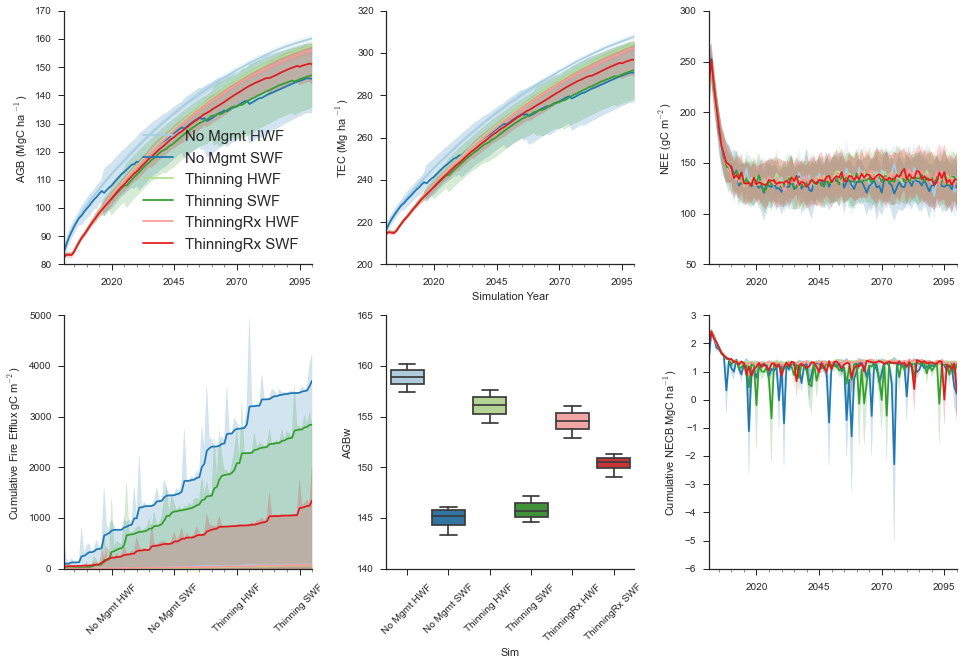

In [12]:
prodDir = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/'

simCentH, simCent_mH, sppbioHis = centOutputGen(prodDir, simNamesV2[0])
simCentS, simCent_mS, sppbioSev = centOutputGen(prodDir, simNamesV2[1])
simCentHT, simCent_mHT, sppbioHisT = centOutputGen(prodDir, simNamesV2[2])
simCentST, simCent_mST, sppbioSevT = centOutputGen(prodDir, simNamesV2[3])
simCentHTRx, simCent_mHTRx, sppbioHisTRx = centOutputGen(prodDir, simNamesV2[4])
simCentSTRx, simCent_mSTRx, sppbioSevTRx = centOutputGen(prodDir, simNamesV2[5])


weightedHWF, simCentCHWF = genCentWeightedMeansDF(simCentH, 'No Mgmt HWF')
weightedSWF, simCentCSWF = genCentWeightedMeansDF(simCentS, 'No Mgmt SWF')
weightedHWFT, simCentCHWFT = genCentWeightedMeansDF(simCentHT, 'Thinning HWF')
weightedSWFT, simCentCSWFT = genCentWeightedMeansDF(simCentST, 'Thinning SWF')
weightedHWFTRx, simCentCHWFTRx = genCentWeightedMeansDF(simCentHTRx, 'ThinningRx HWF')
weightedSWFTRx, simCentCSWFTRx = genCentWeightedMeansDF(simCentSTRx, 'ThinningRx SWF')

totSims = pd.concat([weightedHWF, weightedSWF, weightedHWFT, weightedSWFT,weightedHWFTRx,weightedSWFTRx])
totSimsNW = pd.concat([simCentCHWF, simCentCSWF, simCentCHWFT, simCentCSWFT,simCentCHWFTRx,simCentCSWFTRx])

plotSimulationCarbon(totSims.dropna())

In [116]:
simCentSn = simCentS.dropna()
sppbioSev[sppbioSev.EcoregionIndex == 0] = np.nan
sppbioSev = sppbioSev.dropna()

COVS = []
ECO = []
REP = []

for Rep in np.unique(sppbioSev.rep):
    for eco in np.unique(simCentSn.EcoregionName):
        sppbioSevE = sppbioSev[sppbioSev.rep == Rep]
        sppbioSevE = sppbioSevE[sppbioSevE.Ecoregion == eco]
        simCentSE = simCentSn[simCentSn.rep == Rep]
        simCentSE = simCentSE[simCentSE.EcoregionName == eco]
        sppbioSevE = sppbioSevE.reset_index()
        simCentSE = simCentSE.reset_index()
        sppbioSevE[simCentSE.FireCEfflux == 0] = np.nan
        simCentSE[simCentSE.FireCEfflux == 0] = np.nan

        COVS.append(sppbioSevE.SppBiomass_greenleaf.astype('float').cov(simCentSE.FireCEfflux.astype('float')))
        ECO.append(eco)
        REP.append(Rep)

covariancesNoMgmt = pd.DataFrame(dict(covs = COVS, ecos = ECO, reps = REP))

In [108]:
simCentSTn = simCentST.dropna()
sppbioSevT[sppbioSevT.EcoregionIndex == 0] = np.nan
sppbioSevT = sppbioSevT.dropna()

COVS = []
ECO = []
REP = []

for Rep in np.unique(sppbioSevT.rep):
    for eco in np.unique(simCentSTn.EcoregionName):
        sppbioSevTE = sppbioSevT[sppbioSevT.rep == Rep]
        sppbioSevTE = sppbioSevTE[sppbioSevTE.Ecoregion == eco]
        simCentSTE = simCentSTn[simCentSTn.rep == Rep]
        simCentSTE = simCentSTE[simCentSTE.EcoregionName == eco]
        sppbioSevTE = sppbioSevTE.reset_index()
        simCentSTE = simCentSTE.reset_index()
        sppbioSevTE[simCentSTE.FireCEfflux == 0] = np.nan
        simCentSTE[simCentSTE.FireCEfflux == 0] = np.nan

        COVS.append(sppbioSevTE.SppBiomass_greenleaf.astype('float').cov(simCentSTE.FireCEfflux.astype('float')))
        ECO.append(eco)
        REP.append(Rep)

covariancesThinOnly = pd.DataFrame(dict(covs = COVS, ecos = ECO, reps = REP))

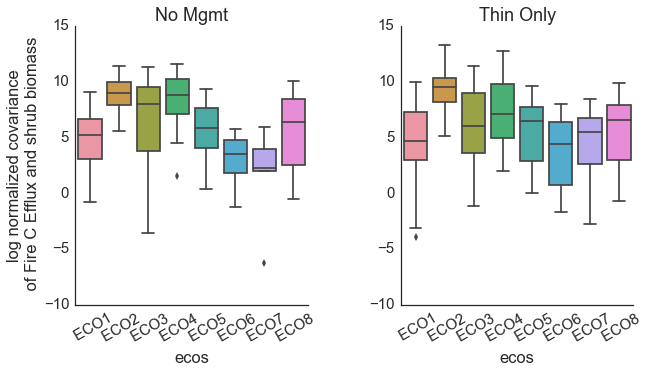

In [114]:
f, ((ax1, ax2)) = plt.subplots(1,2, figsize =(10,5))
plt.subplots_adjust(wspace = 0.4)
#covariancesNoMgmt.covs = np.log(covariancesNoMgmt.covs)
#covariancesThinOnly.covs = np.log(covariancesThinOnly.covs)

g1 = sns.boxplot(x = 'ecos', y = 'covs', ax = ax1, data = covariancesNoMgmt)
g2 = sns.boxplot(x = 'ecos', y = 'covs', ax = ax2, data = covariancesThinOnly)
ax2.set_ylim([-10, 15])
ax1.set_xticklabels(np.unique(ECO), rotation = 30)
ax2.set_xticklabels(np.unique(ECO), rotation = 30)
sns.despine()
sns.set_style('white')
ax1.set_title('No Mgmt')
ax2.set_title('Thin Only')
ax1.set_ylabel('log normalized covariance \n of Fire C Efflux and shrub biomass')
ax2.set_ylabel('')

In [101]:
covariancesThinOnly[covariancesThinOnly.covs == covariancesThinOnly.covs.max()]

covs   ecos  reps
297  565938.692158   ECO2    38

#### Need to implement the output of the coefficient of variance of fire severity
The code below is the premise, we will build up a 3D array of burn severities, and then create a per-replicate coefficient of variance for each replicate. The coefficient of variance across the mean variances for a given simulation will represent the final output for the variance map.

#### First a little test
Is the mean variance by run the same as the variance of all the replicates in the stack? -- No, but its pretty close. Plus, thinking about what we're trying to accomplish, all of the years of replicates for a given simulation aren't independent. We expect within a simulation for a couple runs to be marked by severe fire, and for several to have below average fires. However, within each hundred year run, fuel resitrictions will conserve these fire behaviors, and limit the patterns of severity across the landscape. Therefore, I still think its more legit to look at the mean of variances across each hundred year run within a simulation. But, lets output both anyway for the sake of argument.

In [80]:
test_data = np.random.rand(100, 5)
VarOfAll = test_data.var()
VarByCol = test_data.var(axis=0)
MeanByCol = test_data.mean(axis = 0)
VarOfMeans = MeanByCol.var()
MeanOfVar = VarByCol.mean()
print VarOfAll
print MeanOfVar
print VarOfMeans

0.0833947442635
0.0832591357592
0.000135608504325


In [9]:
## Now outputs both mean severity and coefficient of variance of severity

def severityMapGen(dataDir, simname, plot_yes):
    timesteps = np.linspace(1,100,100)
    wkDir_reps =  dataDir + simname
    num_replicates = len(next(os.walk(wkDir_reps))[1])
    reps = np.arange(1,num_replicates+1,1)
    idx = 0
    for rep in reps:
        counter = 0
        print rep
        for time in timesteps:  
            wkDir_data = wkDir_reps + '/' 'replicate' + str(rep) + '/' + 'fire/'
            sevmap = 'severity-' + str(int(time)) + '.img'
            src_ds = gdal.Open( wkDir_data + sevmap ) 
            sevarray = src_ds.ReadAsArray()
            sevarray = sevarray.astype('float')
            sevarray = sevarray - 2
            sevarray[sevarray < 1] = np.nan
            if counter == 0:
                fullSevStack = sevarray[np.newaxis,...]
            else:
                fullSevStack = np.vstack([fullSevStack, sevarray[np.newaxis,...]])
            counter = counter + 1                

    fullSev = np.nanmean(fullSevStack, axis = 0)
    masked_sev = np.ma.array (fullSev, mask=(np.isnan(fullSev)))

    if plot_yes == True:
        plt.figure(figsize = (8,8))
        plt.imshow(masked_sev, cmap = 'BrBG', vmin = 0, vmax = 5)
        plt.title(simname)
        axx = plt.colorbar(boundaries=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
         ticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
        axx.set_label(simname + 'Mean Fire Severity', fontsize = 15)
        sns.set_style('white')
        sns.despine()    
    return masked_sev

### Restructuring the code to process raster stacks
At the core of the NEE and severity map generation workflow (really any of the gridded outputs from LANDIS), are two operations. The first of which is simply stacking the rasters. I had been doing this fairly inefficiently, stacking rasters on a new axis on a raster by raster basis. Far more efficient approach here is to create a list of rasters to stack, and leverage numpy.dstack() to stack them. Then conducting raster math and nan'ing out inactive cells can be done on the entire stack prior to creating a sum or mean. Much faster, and produces a better result with cleaner code. 

In [13]:
def severityStack(rasterLoc, runLength):
    rasterlist = []
    timesteps = np.linspace(1,runLength,runLength)
    
    repnames = next(os.walk(rasterLoc))[1]
    num_replicates = len(repnames)

    idx = 0
    for rep in repnames:
        counter = 0
        repnum = rep.split('replicate')[1]
        for time in timesteps:  
            wkDir_data = rasterLoc + '/' 'replicate' + repnum + '/' + 'fire/'
            sevmap = 'severity-' + str(int(time)) + '.img'
            src_ds = gdal.Open( wkDir_data + sevmap ) 
            sevarray = src_ds.ReadAsArray()
            sevarray = sevarray.astype('float')
            rasterlist.append(sevarray)
            
    return rasterlist

def severityGen(rasterList):
    rasterStack = np.dstack(rasterList)  
    rasterAdj = rasterStack - 2
    rasterAdj[rasterAdj < 0] = np.nan
    meanSev = np.nanmean(rasterAdj, axis = 2)
    varSev = np.nanvar(rasterAdj, axis = 2)
    return meanSev, varSev

### Looking at some of the map output
First off lets generate some maps of mean fire severity and NEE using the updated function above. This is significantly reworked for speed and accuracy. The combination of two functions above, severityStack and severityGen make up a parsimonious combo of raster processing steps. By taking the output of these functions looped over our simulations, I can build up dicts of mean and cv of severity for plotting and analysis

In [14]:
dataDir = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/'
sevMapsLowP = []
sevVarMapsLowP = []

for sim in simNamesV2:
    print dataDir + sim
    sevrasters = severityStack(dataDir + sim, 100)
    sevMap, sevVarMap = severityGen(sevrasters)
    sevmap = {sim : sevMap}
    sevVarmap = {sim : sevVarMap}

    sevMapsLowP.append(sevmap)
    sevVarMapsLowP.append(sevVarmap)


C:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
C:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/NoMgmtHistoric
Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/NoMgmtSevere
Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/ThinHistoric_FV2
Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/ThinSevere_FV2
Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/ThinRxHistoric_FV2
Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ProductionV2/ThinRxSevere_FV2


In [13]:
## Now outputs both mean severity and coefficient of variance of severity

def NEEMapGen(dataDir, simname, plot_yes):
    timesteps = np.linspace(1,100,100)
    wkDir_reps =  dataDir + simname
    num_replicates = len(next(os.walk(wkDir_reps))[1])
    reps = np.arange(1,num_replicates+1,1)
    idx = 0
    for rep in reps:
        counter = 0
        for time in timesteps:  
            wkDir_data = wkDir_reps + '/' 'replicate' + str(rep) + '/' + 'century/'
            neemap = 'nee-' + str(int(time)) + '.gis'
            src_ds = gdal.Open( wkDir_data + neemap ) 
            neearray = src_ds.ReadAsArray()
            neearray = neearray.astype('float')
            neearray[neearray == 0] = np.nan
            neearray = neearray - 1000
            #if idx == 0:
                #fullVarStack = sevarray[np.newaxis,...]
            #else:
                #fullVarStack = np.vstack([fullVarStack, sevarray[np.newaxis,...]])
            if counter == 0:
                cumulative_neemap = neearray
                varmap = neearray[np.newaxis,...]
            else:
                cumulative_neemap = cumulative_neemap + neearray
                varmap = np.vstack([varmap, neearray[np.newaxis,...]])
            counter = counter + 1 

        if idx == 0:
            finalmap = cumulative_neemap
            repvar = np.nanvar(varmap, axis = 0)
        else:
            finalmap = finalmap + cumulative_neemap
            repvar = repvar + np.nanvar(varmap, axis = 0)
        if plot_yes == True:
            plt.figure(figsize = (8,8))
            plt.imshow(cumulative_neemap, cmap = 'BrBG')
            plt.title(simname)
            axx = plt.colorbar()
            axx.set_label(simname + 'Cumulative NEE', fontsize = 15)
            sns.set_style('white')
            sns.despine()    

        idx = idx + 1
    finalmap = finalmap / num_replicates
    finalvar = repvar / num_replicates
    #fullVar = np.nanvar(fullVarStack, axis = 0)
    finalmap[finalmap == 0] = np.nan
    masked_nee = np.ma.array (finalmap, mask=(np.isnan(finalmap)))
    masked_var = np.ma.array (finalvar, mask=(np.isnan(finalmap)))
    #masked_Fullvar = np.ma.array (fullVar, mask=(np.isnan(finalmap)))

#, masked_Fullvar
    return masked_nee, masked_var

### Now we can mess around with this dict of fire severities and variances
To start just plotting the mean severity maps across all treatments for both historic and severe fire weather. Followed by the variance across replicates for fire severity.

### Fire Severity and CV maps by treatment

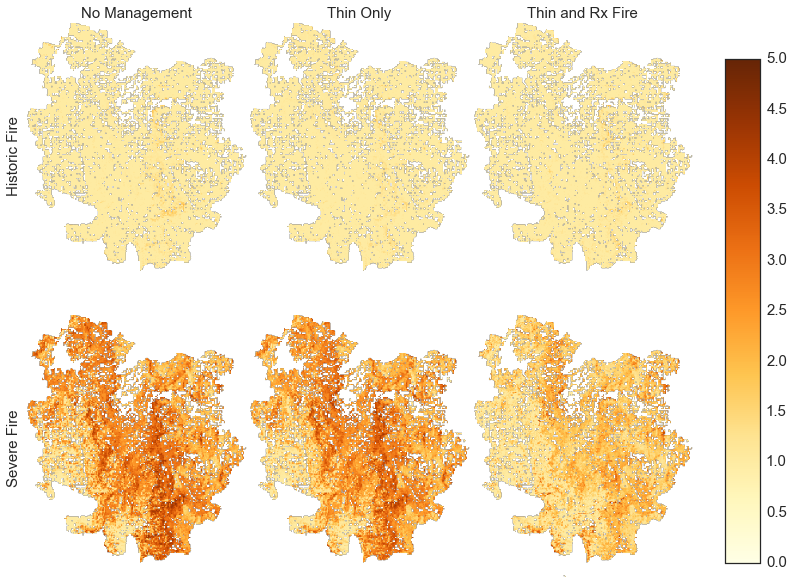

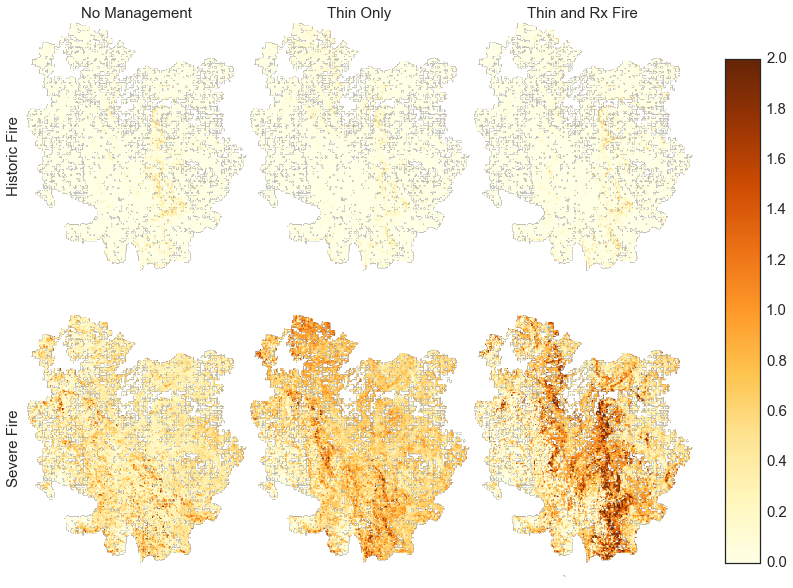

In [17]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize =(16,10))
plt.subplots_adjust(wspace = -.5, hspace = 0.1)
axs = f.axes
sns.despine()
idx = 0
ax1.imshow(sevMapsLowP[0][simNamesV2[0]], cmap = 'YlOrBr', vmin = 0, vmax = 5)
ax2.imshow(sevMapsLowP[2][simNamesV2[2]], cmap = 'YlOrBr', vmin = 0, vmax = 5)
ax3.imshow(sevMapsLowP[4][simNamesV2[4]], cmap = 'YlOrBr', vmin = 0, vmax = 5)
ax4.imshow(sevMapsLowP[1][simNamesV2[1]], cmap = 'YlOrBr', vmin = 0, vmax = 5)
ax5.imshow(sevMapsLowP[3][simNamesV2[3]], cmap = 'YlOrBr', vmin = 0, vmax = 5)
cbarmap = ax6.imshow(sevMapsLowP[5][simNamesV2[5]], cmap = 'YlOrBr', vmin = 0, vmax = 5)
ax1.set_title('No Management', fontsize = 15)
ax2.set_title('Thin Only', fontsize = 15)
ax3.set_title('Thin and Rx Fire', fontsize = 15)
ax1.set_ylabel('Historic Fire', fontsize = 15)
ax4.set_ylabel('Severe Fire', fontsize = 15)
for ax in f.axes:
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
cbar_ax = f.add_axes([0.83, 0.15, 0.03, 0.7])
f.colorbar(cbarmap, cax=cbar_ax)

f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize =(16,10))
plt.subplots_adjust(wspace = -.5, hspace = 0.1)
axs = f.axes
sns.despine()
idx = 0
ax1.imshow(sevVarMapsLowP[0][simNamesV2[0]], cmap = 'YlOrBr', vmin = 0, vmax = 2)
ax2.imshow(sevVarMapsLowP[2][simNamesV2[2]], cmap = 'YlOrBr', vmin = 0, vmax = 2)
ax3.imshow(sevVarMapsLowP[4][simNamesV2[4]], cmap = 'YlOrBr', vmin = 0, vmax = 2)
ax4.imshow(sevVarMapsLowP[1][simNamesV2[1]], cmap = 'YlOrBr', vmin = 0, vmax = 2)
ax5.imshow(sevVarMapsLowP[3][simNamesV2[3]], cmap = 'YlOrBr', vmin = 0, vmax = 2)
cbarmap = ax6.imshow(sevVarMapsLowP[5][simNamesV2[5]], cmap = 'YlOrBr', vmin = 0, vmax = 2)
ax1.set_title('No Management', fontsize = 15)
ax2.set_title('Thin Only', fontsize = 15)
ax3.set_title('Thin and Rx Fire', fontsize = 15)
ax1.set_ylabel('Historic Fire', fontsize = 15)
ax4.set_ylabel('Severe Fire', fontsize = 15)
for ax in f.axes:
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
cbar_ax = f.add_axes([0.83, 0.15, 0.03, 0.7])
f.colorbar(cbarmap, cax=cbar_ax)
sns.set_style('white')

#### Now lets look at the percent change in mean severity and variance of severity between historic and severe fire weather, as a function of treatment.
First ploted as a map, ultimately however it would be pretty awesome to see how this played out as a function of ecosystem type (thinking management unit, since they are heavily based on calveg layers).

<matplotlib.colorbar.Colorbar instance at 0x00000000459C9408>

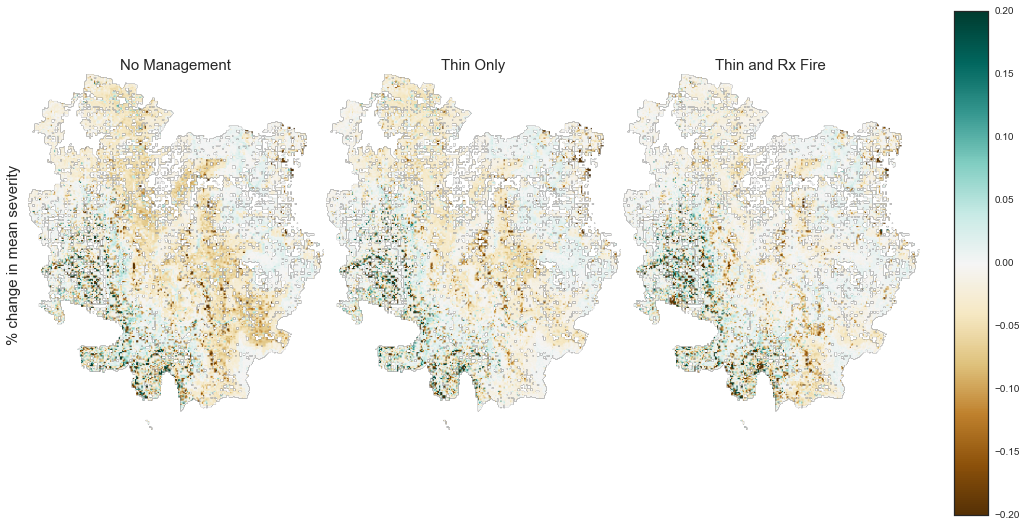

In [75]:

f, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize =(16,10))
plt.subplots_adjust(wspace = 0)
axs = f.axes
sns.despine()
idx = 0
cbarmap = ax1.imshow(((neeMapsLowP[1][simNamesLowP[1]].data - neeMapsLowP[0][simNamesLowP[0]].data) / (neeMapsLowP[0][simNamesLowP[0]].data)), 
           cmap = 'BrBG', vmin = -.2, vmax = .2)
ax2.imshow(((neeMapsLowP[3][simNamesLowP[3]] - neeMapsLowP[2][simNamesLowP[2]]) / (neeMapsLowP[2][simNamesLowP[2]])), 
           cmap = 'BrBG', vmin = -.2, vmax = .2)
ax3.imshow(((neeMapsLowP[5][simNamesLowP[5]] - neeMapsLowP[4][simNamesLowP[4]]) / (neeMapsLowP[4][simNamesLowP[4]])), 
           cmap = 'BrBG', vmin = -.2, vmax = .2)

ax1.set_title('No Management', fontsize = 15)
ax2.set_title('Thin Only', fontsize = 15)
ax3.set_title('Thin and Rx Fire', fontsize = 15)
ax1.set_ylabel('% change in mean severity', fontsize = 15)
for ax in f.axes:
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
cbar_ax = f.add_axes([0.93, 0.15, 0.03, 0.7])
f.colorbar(cbarmap, cax=cbar_ax)

<matplotlib.colorbar.Colorbar instance at 0x000000003BAB3F88>

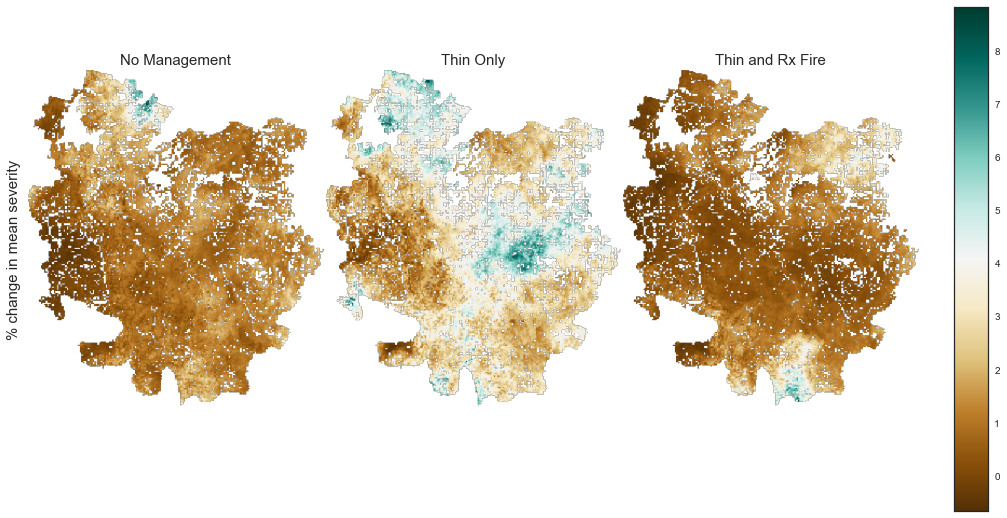

In [76]:
f, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize =(16,10))
plt.subplots_adjust(wspace = 0)
axs = f.axes
sns.despine()
idx = 0
cbarmap = ax1.imshow(((sevMapsLowP[1][simNamesLowP[1]].data - sevMapsLowP[0][simNamesLowP[0]].data) / (sevMapsLowP[0][simNamesLowP[0]].data)), 
           cmap = 'BrBG')
ax2.imshow(((sevMapsLowP[3][simNamesLowP[3]] - sevMapsLowP[2][simNamesLowP[2]]) / (sevMapsLowP[2][simNamesLowP[2]])), 
           cmap = 'BrBG')
ax3.imshow(((sevMapsLowP[5][simNamesLowP[5]] - sevMapsLowP[4][simNamesLowP[4]]) / (sevMapsLowP[4][simNamesLowP[4]])), 
           cmap = 'BrBG')

ax1.set_title('No Management', fontsize = 15)
ax2.set_title('Thin Only', fontsize = 15)
ax3.set_title('Thin and Rx Fire', fontsize = 15)
ax1.set_ylabel('% change in mean severity', fontsize = 15)
for ax in f.axes:
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
cbar_ax = f.add_axes([0.93, 0.15, 0.03, 0.7])
f.colorbar(cbarmap, cax=cbar_ax)

### Looking at NEE and NPP spatially by ecoregion
Strategy here will be to use the ecoregion map as a template to essentially conduct zonal statistics, and aggregate time series on other spatial outputs from LANDIS, like NEE, NPP, and total biomass. Ultimately, we want to specify any input template, and any output dataset, and hash up the output by region. 

In [36]:
from osgeo import osr

def geoAppend(spatialRaster, nonprojectedRaster, outputFileName):
    
    # Read in a raster with spatial data, and identical dimensions to a LANDIS output
    # Ideal files are rasters that are input to LANDIS and also were generated inside
    # a GIS, like your ecoregion or management unit file.
    templatedf = gdal.Open(spatialRaster)
    template = templatedf.ReadAsArray()
    
    # Read in file with no spatial data -- must be same dimensions as your template
    toAppenddf = gdal.Open(nonprojectedRaster)
    toAppend = toAppenddf.ReadAsArray()
    
    # Initialize an empty geotiff
    driver = gdal.GetDriverByName('GTiff')
    
    # Set the name and dimensions of the output
    outputRaster = driver.Create(outputFileName,
                                 toAppend.shape[1],
                                 toAppend.shape[0])
    
    # Assign the geotransform and projection from the input raster
    outputRaster.SetGeoTransform(templatedf.GetGeoTransform())
    outputRaster.SetProjection(templatedf.GetProjection())
    #print templatedf.GetGeoTransform()
    print 'The template projection is ' + templatedf.GetProjection()
    srs = osr.SpatialReference()
    srs.ImportFromEPSG(5070)
    dest_wkt = srs.ExportToWkt()
    outputRaster.SetProjection(dest_wkt)

    
    # Write the array to our gdal geotiff
    outputRaster.GetRasterBand(1).WriteArray(toAppend)
    
    # Write the output raster to disk
    outputRaster.FlushCache()

def saveAsGeoTiff(spatialRaster, ndarray, outputFileName, epsg):
    templatedf = gdal.Open(spatialRaster)
    template = templatedf.ReadAsArray()
    driver = gdal.GetDriverByName('GTiff')
    outputRaster = driver.Create(outputFileName,
                                 template.shape[1],
                                 template.shape[0],
                                 1, gdal.GDT_Float32)
    
    srs = osr.SpatialReference()
    srs.ImportFromEPSG(epsg)
    dest_wkt = srs.ExportToWkt()
    
    outputRaster.SetGeoTransform(templatedf.GetGeoTransform())
    outputRaster.GetRasterBand(1).WriteArray(ndarray)
    outputRaster.SetProjection(dest_wkt)

    outputRaster.FlushCache()


In [47]:
neeMAPtest = neeMapsLowP[1][simNamesLowP[1]].data - \
 neeMapsLowP[0][simNamesLowP[0]].data

neeMAPtest[np.isnan(neeMAPtest)] = -9999

neeMAPtestH = neeMapsLowP[4][simNamesLowP[4]].data - \
 neeMapsLowP[0][simNamesLowP[0]].data

neeMAPtestH[np.isnan(neeMAPtestH)] = -9999

neeMAPtestS = neeMapsLowP[5][simNamesLowP[5]].data - \
 neeMapsLowP[1][simNamesLowP[1]].data

neeMAPtestS[np.isnan(neeMAPtestS)] = -9999

In [42]:

saveAsGeoTiff('Z:\Dan K\DinkeyCreek\LANDIS_RUNS\Dinkey_Ecoregions.tif', 
              neeMAPtest, 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\NEEmap.tif', 5070)

saveAsGeoTiff('Z:\Dan K\DinkeyCreek\LANDIS_RUNS\Dinkey_Ecoregions.tif', 
              neeMAPtestH, 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\NEEmapH.tif', 5070)

saveAsGeoTiff('Z:\Dan K\DinkeyCreek\LANDIS_RUNS\Dinkey_Ecoregions.tif', 
              neeMAPtestS, 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\NEEmapS.tif', 5070)

In [37]:
reference = 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\Dinkey_Ecoregions.tif'
inputF = 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\DinkeyMgmt.tif'
outputF = 'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\DinkeyMgmtGR.tif'



geoAppend(reference, inputF, outputF)

The template projection is PROJCS["NAD83 / Conus Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","5070"]]


In [12]:
import os
import stat
gdal_data = os.environ['GDAL_DATA']
print('is dir: ' + str(os.path.isdir(gdal_data)))
gcs_csv = os.path.join(gdal_data, 'gcs.csv')
print('is file: ' + str(os.path.isfile(gcs_csv)))
st = os.stat(gcs_csv)
print('is readable: ' + str(bool(st.st_mode & stat.S_IRGRP)))

is dir: True
is file: True
is readable: True


In [21]:
from rasterstats import zonal_stats, point_query
stats = zonal_stats('Z:\Dan K\DinkeyCreek\LANDIS_RUNS\mgmtUnit_5070.shp', 
                    'Z:\Dan K\DinkeyCreek\LANDIS_RUNS\NEEmap.tif', nodata = -9999)
stats

[{'count': 12265,
  'max': 0.267196923494339,
  'mean': -0.026748810249885343,
  'min': -0.2992905378341675},
 {'count': 8980,
  'max': 0.12700974941253662,
  'mean': -0.03965915263628376,
  'min': -0.4189603328704834},
 {'count': 7421,
  'max': 188.2188720703125,
  'mean': 0.022885121966352874,
  'min': -11.83179759979248},
 {'count': 5815,
  'max': 0.05600888654589653,
  'mean': -0.005299332176726744,
  'min': -0.36608102917671204},
 {'count': 2683,
  'max': 0.11684402078390121,
  'mean': -0.015443488372336382,
  'min': -1.0355024337768555},
 {'count': 7943,
  'max': 33.00702667236328,
  'mean': -0.011915180735063991,
  'min': -11.041308403015137}]

### Generating fire size and severity distributions
Quickly produce histograms of fire size by simulation, capturing some statistics like number of fires, and number of fires by severity class.

In [14]:
## Soon to be wrapped up in a printing function -- quick diagnostic for fire size and severity metrics
fireLoc = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/Production/'
dffsLog = 'dynamic-fire-test-log.csv'

counter = 0
for simname in simNamesLowP:
    num_replicates = len(next(os.walk(fireLoc + simname))[1])
    reps = np.arange(1,num_replicates+1,1)
    for rep in reps:
        wkDir_c = fireLoc + simname + '/replicate' + str(rep) + '/'
        if counter == 0:
            flogTot = pd.read_csv(wkDir_c + dffsLog)
            flogTot['SIM'] = simname
            flogTot['REP'] = rep
        else:           
            flog = pd.read_csv(wkDir_c + dffsLog)
            flog['SIM'] = simname
            flog['REP'] = rep
            flogTot = pd.concat([flogTot, flog])
        counter = counter + 1

flogTot[flogTot.TotalSitesInEvent <= 0].TotalSitesInEvent = np.nan
flogTot = flogTot.dropna()

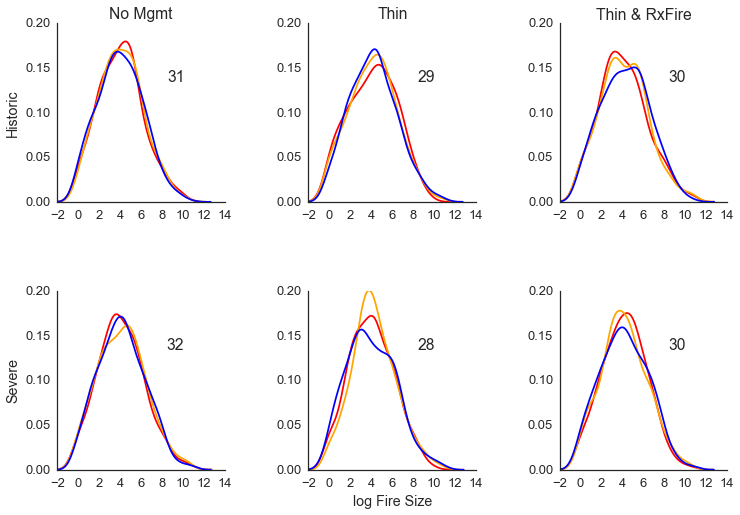

In [126]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize =(12,8))
axs = f.axes
idx = 0
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
for sim in simNamesLowP:
    if idx == 0:
        ax = axs[idx]
        ax.set_ylabel('Historic')
        ax.set_title('No Mgmt')
    elif idx == 1:
        ax = axs[3]
        ax.set_ylabel('Severe')
        ax.set_title('')
    elif idx == 2:
        ax = axs[1]
        ax.set_title('Thin')
    elif idx == 3:
        ax = axs[4]
    elif idx == 4:
        ax = axs[2]
        ax.set_title('Thin & RxFire')

    else:
        ax = axs[5]

    simsub = flogTot[flogTot.SIM == sim]
    FR1 = simsub[simsub.InitFireRegion == 'FR1']
    FR2 = simsub[simsub.InitFireRegion == 'FR2']
    FR3 = simsub[simsub.InitFireRegion == 'FR3']

    sns.distplot(np.log(FR1.TotalSitesInEvent), 
                 hist = False, color = 'red', ax = ax)
    sns.distplot(np.log(FR2.TotalSitesInEvent), 
                 hist = False, color = 'orange', ax = ax)
    sns.distplot(np.log(FR3.TotalSitesInEvent), 
                 hist = False, color = 'blue', ax = ax)

    ax.set_xlim([-2,14])
    ax.set_ylim([0,0.2])
    ax.annotate(simsub.TotalSitesInEvent.count() / len(np.unique(simsub.REP)),
            xy=(.7, .7), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')    
    if idx == 3:
        ax.set_xlabel('log Fire Size')
    else:
        ax.set_xlabel('')
    idx = idx + 1
sns.despine()
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')
plt.savefig('FireKDE.tiff')


In [62]:
flogTot['SEV'] = 'na'
flogTot.SEV[(flogTot.SIM == simNamesLowP[0]) | \
            (flogTot.SIM == simNamesLowP[2]) | \
            (flogTot.SIM == simNamesLowP[4])] = 'Historic'
flogTot.SEV[(flogTot.SIM == simNamesLowP[1]) | \
            (flogTot.SIM == simNamesLowP[3]) | \
            (flogTot.SIM == simNamesLowP[5])] = 'Severe'

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


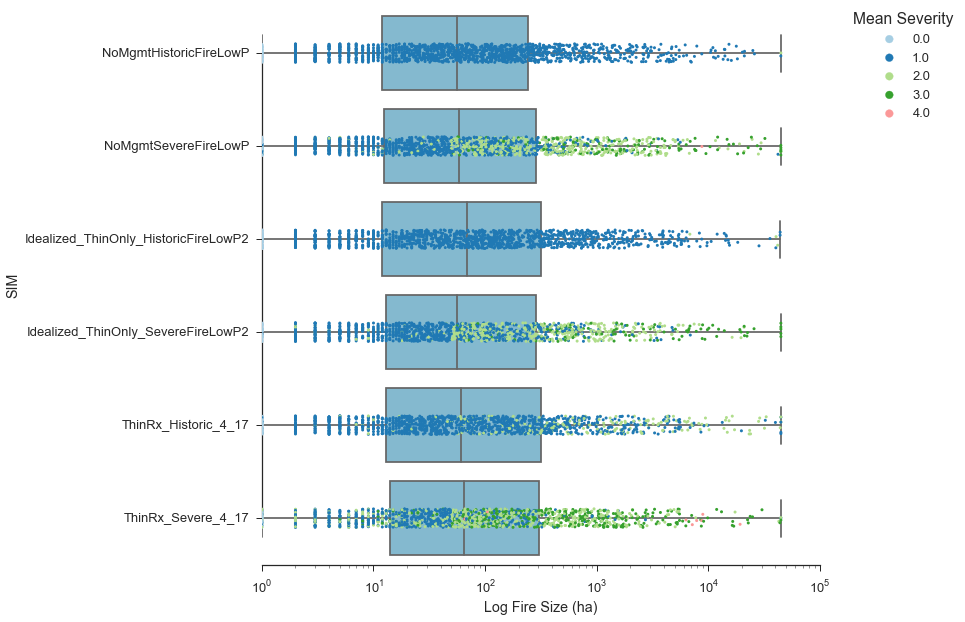

In [120]:
sns.set(style="ticks", palette="Paired", context = 'notebook', font_scale=1.3)
f, ax = plt.subplots(1,1, figsize = (10,10))
# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="TotalSitesInEvent", y="SIM", data=flogTot,
                 whis=np.inf, color="c")

# Add in points to show each observation
check = sns.stripplot(x="TotalSitesInEvent", y="SIM", data=flogTot,
              jitter=True, size=3, hue=flogTot.MeanSeverity.round(), linewidth=0)

# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(trim=True)
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
          title = 'Mean Severity')
ax.set_xlabel('Log Fire Size (ha)')
plt.savefig('Size-Sev_Dist.tiff', bbox_extra_artists=(lgd,), bbox_inches='tight')

### NEE currently does not incorporate Fire C fluxes (NEE is not NECB).
In order to calculate NECB, we need to combine some information from the DFFS output as well as the century output. The first step of calculating the ecoregion weighted average of FireC_Efflux across the watershed we handle above when we average the rest of the C fluxes and stocks. To calculate NECB, we just need to add those FireC fluxes to our NEE fluxes. In order to calculate the total C released in both scenarios, we have to grab the DFFS log and leverage the 'TotalSitesInEvent' column.

### Generating trajectory maps for individual species biomass
It may tell an interesting story to look at the trajectory for specific species, or for the total biomass over time under different simulation contexts (treatment and fire weather scenarios). Doing that is more or less the same thing as looking at patterns in fire -- with the added complexity of needing to preserve some sort of surface time series. Here, the first cut will be to look at the net increase or decrease of the biomass in the experimental area as a function of time since simulation stability (~ year 12 or so). An accompanying map would be the variance during that period as well.

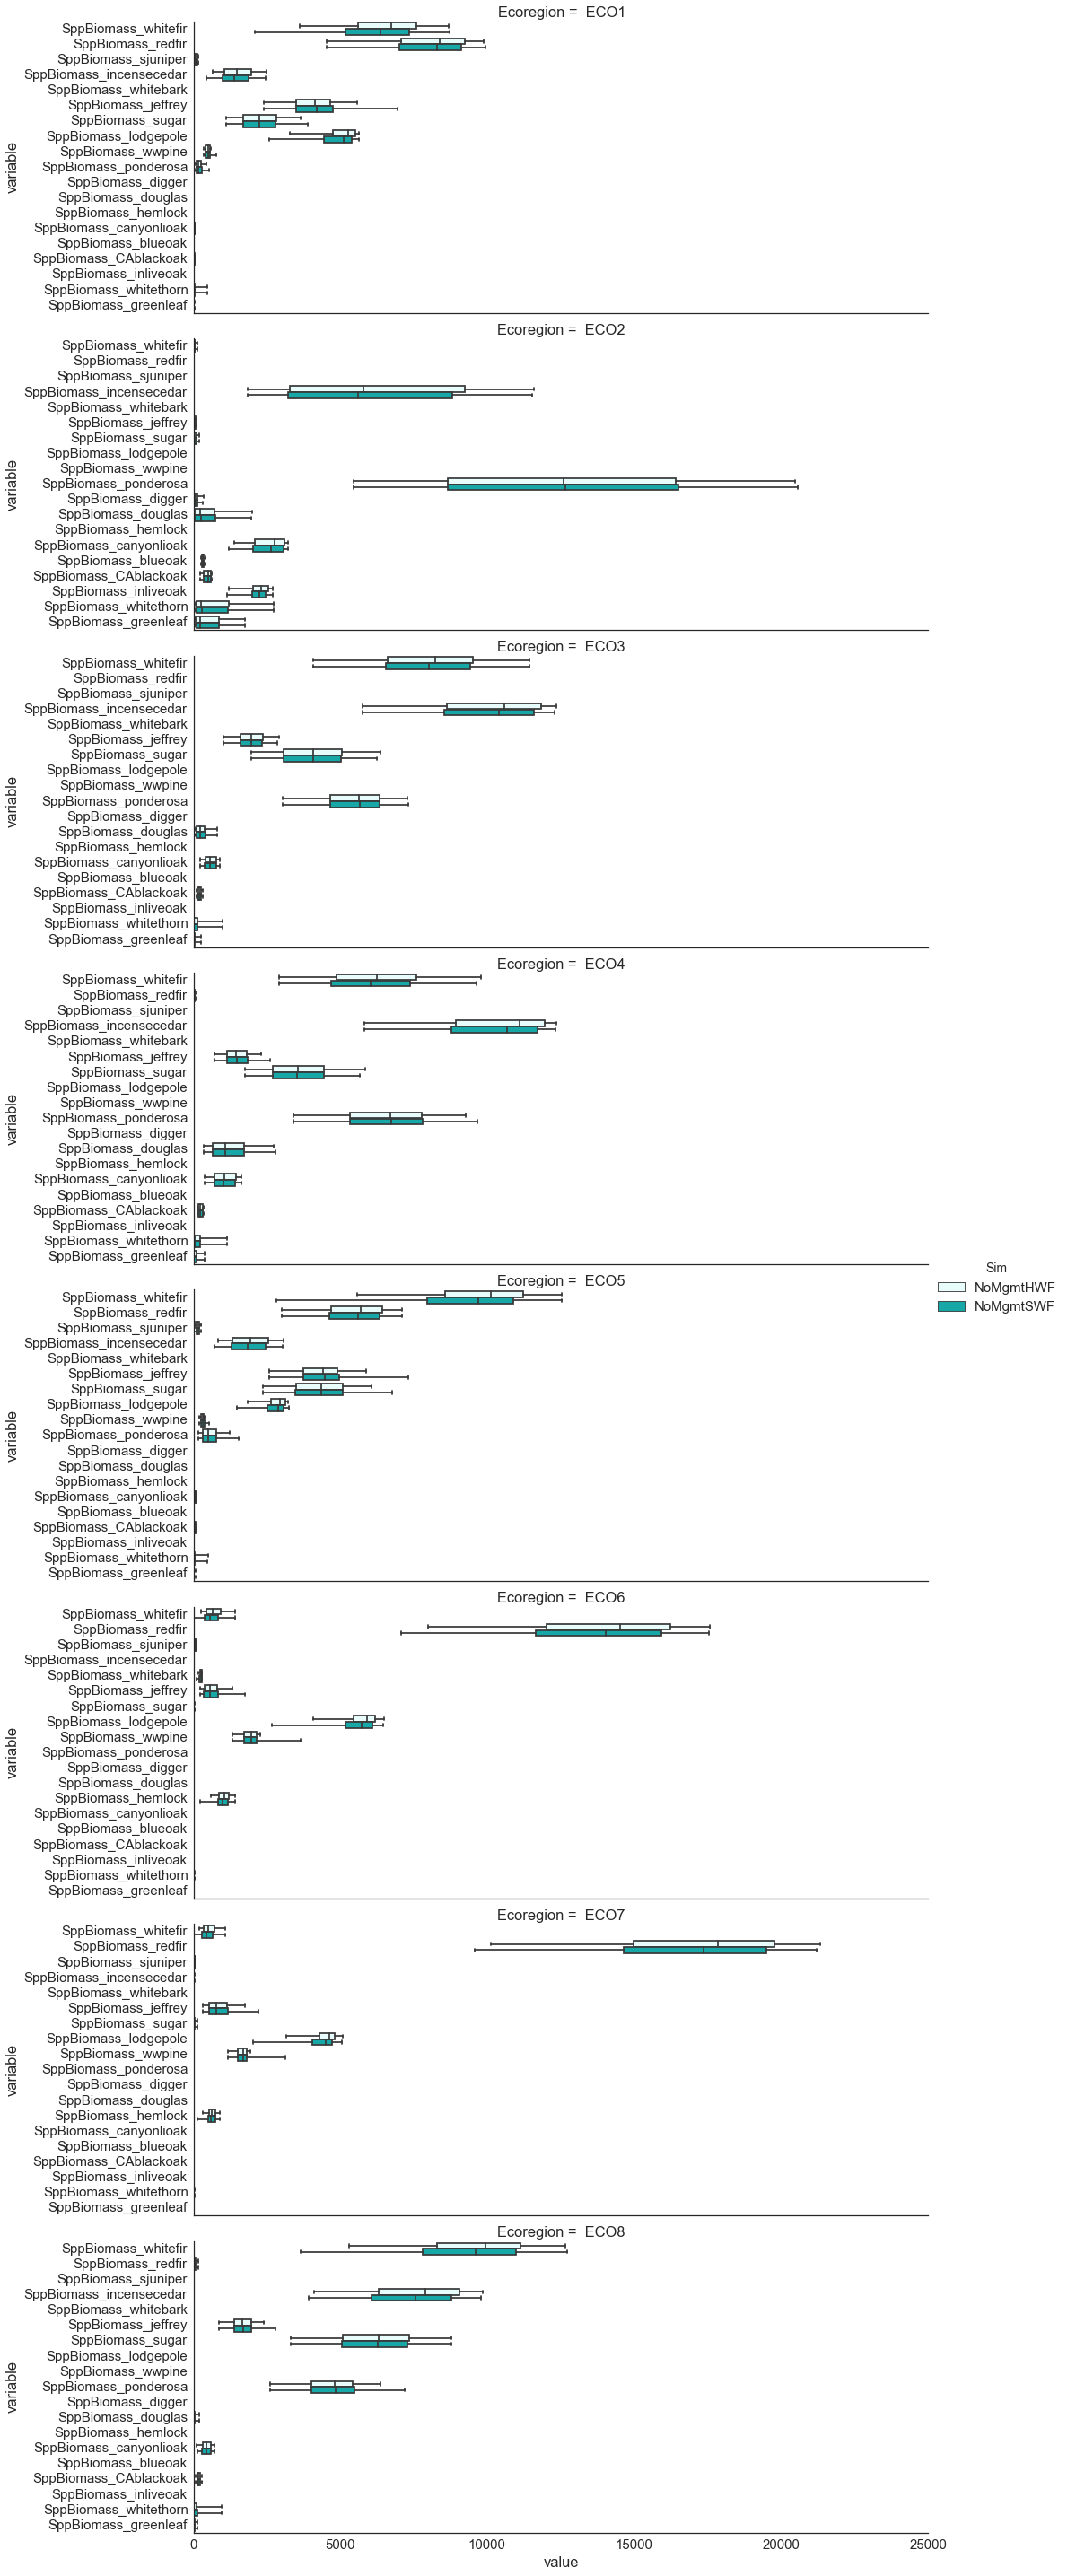

In [286]:
# Remove the 'none' ecroregion, and drop all NaN values
sppbioHis[sppbioHis.EcoregionIndex == 0] = np.nan
sppbioDFH = sppbioHis.dropna()
sppBioH = sppbioDFH.drop(['EcoregionIndex', 'NumSites','Unnamed: 23'], axis = 1)
sppMeltedH = pd.melt(sppBioH, id_vars=['Time','Ecoregion','rep'])
sppMeltedH['Sim'] = 'NoMgmtHWF'

sppbioSev[sppbioSev.EcoregionIndex == 0] = np.nan
sppbioDFS = sppbioSev.dropna()
sppBioS = sppbioDFS.drop(['EcoregionIndex', 'NumSites','Unnamed: 23'], axis = 1)
sppMeltedS = pd.melt(sppBioS, id_vars=['Time','Ecoregion','rep'])
sppMeltedS['Sim'] = 'NoMgmtSWF'

sppMelted = pd.concat([sppMeltedH, sppMeltedS])
sppMelted.value = sppMelted.value.astype('float')
sppMelted['logval'] = np.log(sppMelted.value)
ax = sns.factorplot(x="value", y="variable", hue = 'Sim', row = 'Ecoregion', data=sppMelted,
                 whis=np.inf, color="c", kind = 'box', size=5, aspect=3)